<h1><center><font size=10 color="green">Project 2 - Cars4U</center></font></h1>
<h1><center>Nilesh Kulkarni</center></h1>

# 1. Given Problem Statement


<h1><b><font size=3>Context</font></b></h1>

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.


<h1><b><font size=3>Objective</font></b></h1>

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

<h1><b><font size=3>Data Dictionary</font></b></h1>

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below - 

  S.No.: Serial number

  Name: Name of the car which includes brand name and model name

  Location: Location in which the car is being sold or is available for purchase (cities)

  Year: Manufacturing year of the car

  Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km

  Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

  Transmission: The type of transmission used by the car (Automatic/Manual)

  Owner: Type of ownership

  Mileage: The standard mileage offered by the car company in kmpl or km/kg

  Engine: The displacement volume of the engine in CC

  Power: The maximum power of the engine in bhp

  Seats: The number of seats in the car

  New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)

  Price: The price of the used car in INR Lakhs

# 2. Problem Framing

Aim of this project is to devise strategies to maximize the profitability of Cars4U business.

Towards that, the expectation is to create a Machine Learning Model that predicts price of used cars based on the features in the dataset provided. Based on the model and its independent features, business can be advised on the target customers as well as parameters to leverage to rightly price used cars to maximize sales.

Dependent Feature in this case is - Price of used car. As its a numeric feature, this is a Regression problem. We will be using <b><font color="blue">Linear Regression</b></font>. 

As there are several Independent Features, this is a <b><font color="blue">Multiple Linear Regression</b></font> exercise.

# 3. Identify Model Evaluation Metric

Below metrics will be used to evaluate the model - 

1. <b><font color="blue">R-squared (r2_score from sklearn.metrics library)</b></font> - Coefficient of determination, percentage of variation of the dependent feature explained by the model. It will always increase as more independent features are added. Jigher the value, better the model.

2. <b><font color="blue">Adj. R-squared</b></font> - R-squared adjusted for number of independent features in the model. Higher the better and is a better indicator of the model. Based on the value of Adjusted R-squared, only those independent features can be retained in the model that contribute to the model. Higher the value, better the model.

3. <b><font color="blue">MAE (mean_absolute_error from sklearn.metrics library) </b></font>- Lower the value, better the model.

4. <b><font color="blue">RMSE (mean_squared_error from sklearn.metrics library)</b></font>- Square root of MSE is calculated. Lower the value, better the model.

# 4. Coding standards used

Temporary Variables

1. Temporary variables created are prefixed by Temp_
2. Temporary variables are created for reuse of the code where possible
3. Temporary variables are deleted as soon as their purpose is served, to save memory
4. Temporary variables calculated for TRAIN dataset are used for imputing the data in TEST, where appropriate

Features
1. Features created as a result of Feature Engineering are prefixed by FE_
2. Features created after Boxcox PowerTransformer are prefixed by pt_


# 5. Importing required libraries

In [13]:
# Import libraries

# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black#

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import datetime as dt

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# Restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

# for Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For boxcox
from scipy.stats import boxcox 
from sklearn.preprocessing import PowerTransformer

In [14]:
#prevent SettingWithCopyWarning message from appearing
# had to be used as Jupyter notebook execution showed warnings that are not seen in Google Colab

pd.options.mode.chained_assignment = None

# 6. Importing given dataset

In [15]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Import the dataset as-is
# Created a copy of the dataset so that original dataset is retained as-is for reference in case needed

#This line was used with Google Colab
df=pd.read_csv('/content/drive/My Drive/AI-ML/Module2_Supervised-Regression/PROJECT-2/used_cars_data.csv')

#Used with Jupyter on laptop
#df=pd.read_csv('used_cars_data.csv')

df_orig_copy=df.copy()

In [17]:
 # Review sample 10 rows to confrm that data is loaded correctly 
df.sample(10, random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.00,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.00,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.00,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.00,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.00,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.00,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.00,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.00,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.00,9.36,8.20


In [18]:
# Review last 5 rows to confirm that data is loaded correctly
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.00,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.00,10.15,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.00,86.97,NaN


In [183]:
df[df['New_Price'] < df['Price']]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
21,Maruti S Cross DDiS 200 Alpha,Bangalore,2015,55392,Diesel,Manual,Second,23.65 kmpl,1248 CC,88.5 bhp,5.00,7.88,8.25
392,Mercedes-Benz S Class 2005 2013 S 350 CDI,Coimbatore,2017,56451,Diesel,Automatic,First,13.5 kmpl,2987 CC,282 bhp,5.00,49.49,62.81
431,Maruti Baleno Alpha Automatic,Coimbatore,2018,12831,Petrol,Automatic,First,21.4 kmpl,1197 CC,83.1 bhp,5.00,8.80,9.89
655,Jaguar XJ 2.0L Portfolio,Mumbai,2017,10501,Petrol,Automatic,First,9.43 kmpl,1999 CC,237.4 bhp,5.00,69.67,75.00
693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.00,49.49,55.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5677,Maruti SX4 S Cross DDiS 200 Zeta,Jaipur,2016,70000,Diesel,Manual,First,23.65 kmpl,1248 CC,88.5 bhp,5.00,7.88,8.85
5743,Hyundai Santa Fe 4WD AT,Coimbatore,2016,45794,Diesel,Automatic,First,13.01 kmpl,2199 CC,194.3 bhp,7.00,10.25,20.67
5769,Tata Tiago 1.2 Revotron XZ,Coimbatore,2019,20712,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.00,6.59,6.94
5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.00,11.30,120.00


Looks like there are records with missing Price (Dependent Feature) values.

# 7. TOTAL Dataset - Basic Data Checks

Basic data checks are done on the Total dataset. This is to check if any data manipulations can be done, without causing any data leakge. 

In [19]:
# Check shape of the data
print(" Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Rows: 7253 
 Columns: 14


In [20]:
# Check for duplicate rows

df.duplicated().sum()

0

In [21]:
# Check basic structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


Data types look ok on most part except - 
1. Seats should be an integer
2. Year is 4 digits, can be an integer as we should be using age of the car as a feature
3. Mileage, Engine and Power should be numeric, need to check why its object

In [22]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

Missing values for few features, including Price which the dependent feature. Records with missing Price values should be removed from the analysis

In [23]:
df.describe(include='all')

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.00,7253,7253,7253.00,7253.00,7253,7253,7253,7251,7207,7078,7200.00,7253.00,6019.00
unique,NaN,2041,11,NaN,NaN,5,2,4,450,150,385,NaN,NaN,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,NaN,NaN
freq,NaN,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,NaN,NaN
mean,3626.00,NaN,NaN,2013.37,58699.06,NaN,NaN,NaN,NaN,NaN,NaN,5.28,21.31,9.48
std,2093.91,NaN,NaN,3.25,84427.72,NaN,NaN,NaN,NaN,NaN,NaN,0.81,24.26,11.19
min,0.00,NaN,NaN,1996.00,171.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,3.91,0.44
25%,1813.00,NaN,NaN,2011.00,34000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00,7.88,3.50
50%,3626.00,NaN,NaN,2014.00,53416.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00,11.30,5.64
75%,5439.00,NaN,NaN,2016.00,73000.00,NaN,NaN,NaN,NaN,NaN,NaN,5.00,21.69,9.95


1. No duplicate rows, thats good!
2. There are missing values for the Dependent Feature, we will remove those records in the next step. 
3. Several other Independent Features have missing values as well
4. S. No. - Looks like Serial Number of the record, we will not need this
5. Name - 2041 different car model records in the dataset. Most number of records are for Mahindra XUV500 W8 2WD	
6. Location - Not surprisingly, Mumbai has the highest number, out of 11 different locations
7. Year - Its a numeric datatype, not date. We will anyway calculate age of the car, which will be more relevant for the model
8. Km Driven - Max value is 6.5 Million, which is very high for a car, outliers need to be checked
9. Fuel_Type - 5 different types, diesel being most common
10. Transmission - 2 as expected
11. Engine - Engine size probably should be numeric, so needs to be checked more
12. Power - 74 bhp to be the most common value
13. Seats - 5 Seater cars are the most popular 1/2/3 quartiles are all 5 seaters
14. New_Price - Max value is way above 3rd quartile value, outliers need to be checked
15. Price - Max value is way above 3rd quartile value, outliers need to be checked

# 8. TOTAL Dataset - Initial Data Preprocessing
  It is still the TOTAL dataset as of now. We will do some initial data preprocessing on this dataset, still ensuring that there is no Data Leakage is introduced. 

In [24]:
# Remove features that are certainly do not add value to the model training and hence should be removed
# Remove Feature S.No. Total Number of Features remaining will then be 13

df.drop('S.No.', axis=1, inplace=True)

In [25]:
# Remove records that are certainly do not add value to the model training and hence should be removed
# Price of the used car needs to be predicted. Records where this feature is missing, will not contribute to the model, hence those records can be dropped. In the real world, such cases should be taken up with SMEs to understand how data can be as complete as possible.

df.drop(df[df['Price'].isnull()].index, axis=0, inplace=True)


In [26]:
# Check shape of the data AFTER dropping features and records that are not needed

print(" Total Dataset \n Rows:", df.shape[0], '\n', "Columns:" , df.shape[1])

 Total Dataset 
 Rows: 6019 
 Columns: 13


In [27]:
# Check features that are of object type

df.columns[df.dtypes == 'object']

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

In [28]:
# Remove any leading and trailing spaces from object features

Temp_cat_cols = df.columns[df.dtypes == 'object']

for item in Temp_cat_cols:
  df[item] = df[item].str.strip()

In [29]:
# Choose a list of all categorical variables in the entire dataset 
Temp_cat_cols =  ['Location', 'Fuel_Type', 'Transmission','Owner_Type']

# Printing the count of unique categorical levels in each column
for column in Temp_cat_cols:
    #print(df[column].value_counts(normalize=True))
    print(f'For {column}, there are {df[column].nunique()} values in the main dataaet')
    print(f'For {column}, there are {df[column].unique()} values in the main dataaet')
    print("-" * 50)

For Location, there are 11 values in the main dataaet
For Location, there are ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad'] values in the main dataaet
--------------------------------------------------
For Fuel_Type, there are 5 values in the main dataaet
For Fuel_Type, there are ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric'] values in the main dataaet
--------------------------------------------------
For Transmission, there are 2 values in the main dataaet
For Transmission, there are ['Manual' 'Automatic'] values in the main dataaet
--------------------------------------------------
For Owner_Type, there are 4 values in the main dataaet
For Owner_Type, there are ['First' 'Second' 'Fourth & Above' 'Third'] values in the main dataaet
--------------------------------------------------


# 9. Prepare TRAIN and TEST datasets

Separate TRAIN and TEST datasets from TOTAL dataset in 70 / 30 proportion. All EDA will be done only on TRAIN dataset. 

In [30]:
# Let's separate data for TRAIN and TEST in the prportion of 70 / 30

df_train, df_test = train_test_split(df , test_size = 0.3, random_state= 10)

In [31]:
# Check sample records for TRAIN

df_train.sample(10, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5753,Nissan Terrano XL Plus 85 PS,Jaipur,2014,60000,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.00,16.65,6.00
661,Hyundai Grand i10 CRDi Sportz,Jaipur,2014,64000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.00,7.45,4.15
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,2012,55339,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.00,10.15,2.65
2612,BMW 3 Series 320d Prestige,Chennai,2014,70000,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.00,54.43,17.55
2549,Maruti Swift Dzire VXI,Pune,2014,68218,Petrol,Manual,First,19.1 kmpl,1197 CC,85.8 bhp,5.00,7.88,4.90
3030,BMW 3 Series 320d Sport,Mumbai,2012,37000,Diesel,Automatic,Third,22.69 kmpl,1995 CC,190 bhp,5.00,54.43,15.00
1304,Hyundai i20 Magna Optional 1.2,Delhi,2013,63777,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.00,10.25,3.67
4223,BMW X6 xDrive30d,Coimbatore,2014,39626,Diesel,Automatic,First,11.2 kmpl,2993 CC,241 bhp,4.00,55.07,40.66
3187,Volkswagen Vento Diesel Highline,Chennai,2013,150000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,5.00
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,2012,62000,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.00,24.01,7.75


In [32]:
# Check sample records for TEST

df_test.sample(10, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
1717,Mahindra Xylo D4,Hyderabad,2015,169000,Diesel,Manual,First,14.95 kmpl,2489 CC,93.7 bhp,7.00,11.69,5.00
5962,Maruti Ritz VDi,Kolkata,2010,47722,Diesel,Manual,First,21.1 kmpl,1248 CC,73.9 bhp,5.00,7.88,1.70
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.00,10.25,2.70
1920,Maruti Dzire VDI,Delhi,2016,45376,Diesel,Manual,First,28.4 kmpl,1248 CC,73.75 bhp,5.00,8.58,5.75
2436,Hyundai i10 Magna LPG,Jaipur,2012,53000,LPG,Manual,Second,19.2 km/kg,1086 CC,68.05 bhp,5.00,10.25,2.85
3217,Honda City i-VTEC CVT VX,Jaipur,2017,35000,Petrol,Automatic,First,18.0 kmpl,1497 CC,117.3 bhp,5.00,14.67,7.70
2236,Audi A6 2011-2015 2.0 TDI Premium Plus,Delhi,2014,58000,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.00,67.10,18.50
785,Maruti Wagon R VXI BS IV,Bangalore,2010,81245,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.00,5.51,2.45
5360,Renault Duster 110PS Diesel RxL,Mumbai,2014,58003,Diesel,Manual,First,19.01 kmpl,1461 CC,108.45 bhp,5.00,15.05,5.75
5147,Mahindra Scorpio SLE BSIV,Pune,2012,99000,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,8.00,18.86,6.00


In [33]:
# Shapes of TOTAL, TRAIN and TEST Datasets 

print(" TOTAL Dataset \n Rows:", df.shape[0], '\n', "Columns:" , df.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", df_train.shape[0], '\n', "Columns:" , df_train.shape[1], "\n")

print(" TRAIN Dataset \n Rows:", df_test.shape[0], '\n', "Columns:" , df_test.shape[1], "\n")

 TOTAL Dataset 
 Rows: 6019 
 Columns: 13 

 TRAIN Dataset 
 Rows: 4213 
 Columns: 13 

 TRAIN Dataset 
 Rows: 1806 
 Columns: 13 



In [34]:
# Printing the count of unique category feature values in TRAIN

print(f'Category features in TRAIN Dataset \n')
for column in Temp_cat_cols:
    print(f'For {column} - there are {df_train[column].nunique()} distinct values')
    print(f'Values are {df_train[column].unique()}')
    print("-" * 50)

Category features in TRAIN Dataset 

For Location - there are 11 distinct values
Values are ['Delhi' 'Hyderabad' 'Mumbai' 'Jaipur' 'Pune' 'Kochi' 'Bangalore'
 'Coimbatore' 'Chennai' 'Kolkata' 'Ahmedabad']
--------------------------------------------------
For Fuel_Type - there are 5 distinct values
Values are ['Diesel' 'Petrol' 'CNG' 'LPG' 'Electric']
--------------------------------------------------
For Transmission - there are 2 distinct values
Values are ['Manual' 'Automatic']
--------------------------------------------------
For Owner_Type - there are 4 distinct values
Values are ['First' 'Second' 'Third' 'Fourth & Above']
--------------------------------------------------


In [35]:
# Printing the count of unique category feature values in TEST

print(f'Category features in TEST Dataset \n')
for column in Temp_cat_cols:
    print(f'For {column} - there are {df_test[column].nunique()} distinct values')
    print(f'Values are {df_test[column].unique()}')
    print("-" * 50)

Category features in TEST Dataset 

For Location - there are 11 distinct values
Values are ['Mumbai' 'Chennai' 'Coimbatore' 'Jaipur' 'Delhi' 'Kolkata' 'Hyderabad'
 'Bangalore' 'Pune' 'Kochi' 'Ahmedabad']
--------------------------------------------------
For Fuel_Type - there are 5 distinct values
Values are ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
--------------------------------------------------
For Transmission - there are 2 distinct values
Values are ['Manual' 'Automatic']
--------------------------------------------------
For Owner_Type - there are 4 distinct values
Values are ['First' 'Second' 'Third' 'Fourth & Above']
--------------------------------------------------


In [36]:
df_train.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                1
Engine                28
Power                105
Seats                 31
New_Price              0
Price                  0
dtype: int64

In [37]:
df_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine                8
Power                38
Seats                11
New_Price             0
Price                 0
dtype: int64

In [38]:
del Temp_cat_cols

Number of distinct values for category features is equal in TRAIN and TEST. So no action is required. If there was a difference, we might have removed categories missing in TEST from TRAIN dataset as well.

TRAIN and TEST Datasets are correctly set now.

# 10. TRAIN Dataset - EDA & Preprocessing

Purpose of this analysis is find more details about individual features and its characteristics. Data Preprocessing is done at the same time as well. These operations are done on TRAIN dataset for now.

Analysis includes - 
1. Checking the distribution and Univariate analysis
2. Multivariate analysis
3. Ensuring that Units of Measure are consistent for all records for a feature
4. Treat missing values
5. Treat outliers for numeric features
6. Feature Engineering - including Feature Scaling if / as needed
7. Note observations / insights

In [39]:
# Check sample records for TRAIN

df_train.sample(10, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5753,Nissan Terrano XL Plus 85 PS,Jaipur,2014,60000,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.00,16.65,6.00
661,Hyundai Grand i10 CRDi Sportz,Jaipur,2014,64000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.00,7.45,4.15
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,2012,55339,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.00,10.15,2.65
2612,BMW 3 Series 320d Prestige,Chennai,2014,70000,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.00,54.43,17.55
2549,Maruti Swift Dzire VXI,Pune,2014,68218,Petrol,Manual,First,19.1 kmpl,1197 CC,85.8 bhp,5.00,7.88,4.90
3030,BMW 3 Series 320d Sport,Mumbai,2012,37000,Diesel,Automatic,Third,22.69 kmpl,1995 CC,190 bhp,5.00,54.43,15.00
1304,Hyundai i20 Magna Optional 1.2,Delhi,2013,63777,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.00,10.25,3.67
4223,BMW X6 xDrive30d,Coimbatore,2014,39626,Diesel,Automatic,First,11.2 kmpl,2993 CC,241 bhp,4.00,55.07,40.66
3187,Volkswagen Vento Diesel Highline,Chennai,2013,150000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,5.00
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,2012,62000,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.00,24.01,7.75


## 10a. EDA - Univariate Analysis and Data Preprocessing

Purpose of this analysis is find more details about individual feature and its characteristics

### 10a.1. Location

In [40]:
Temp_v='Location'

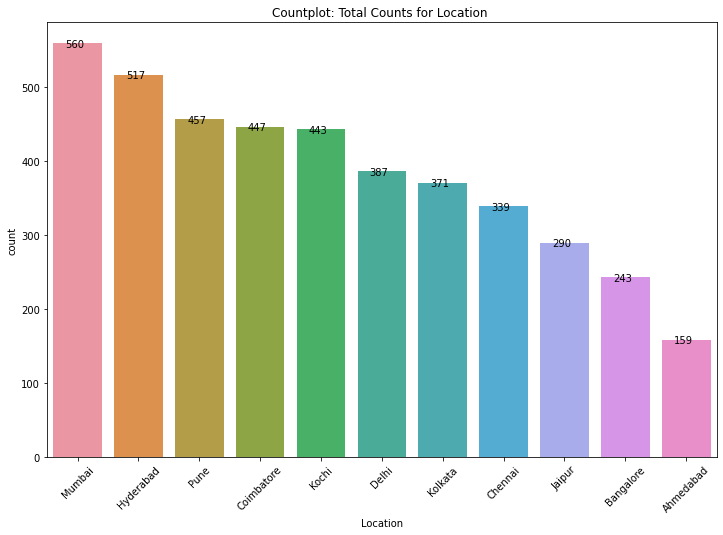

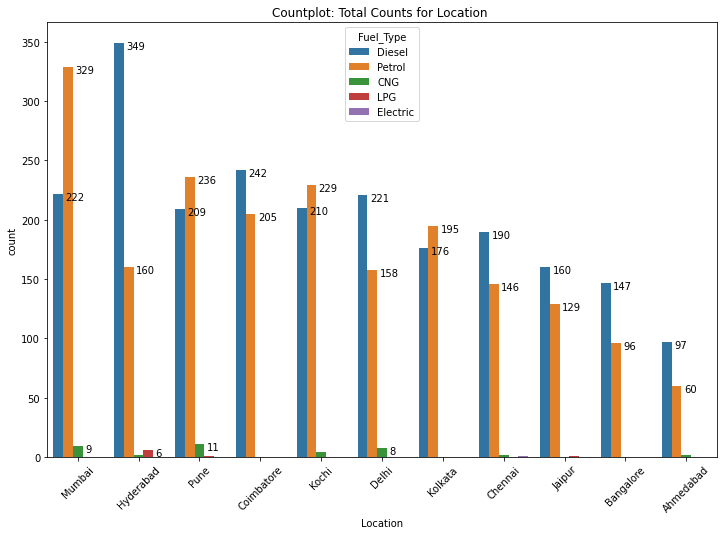

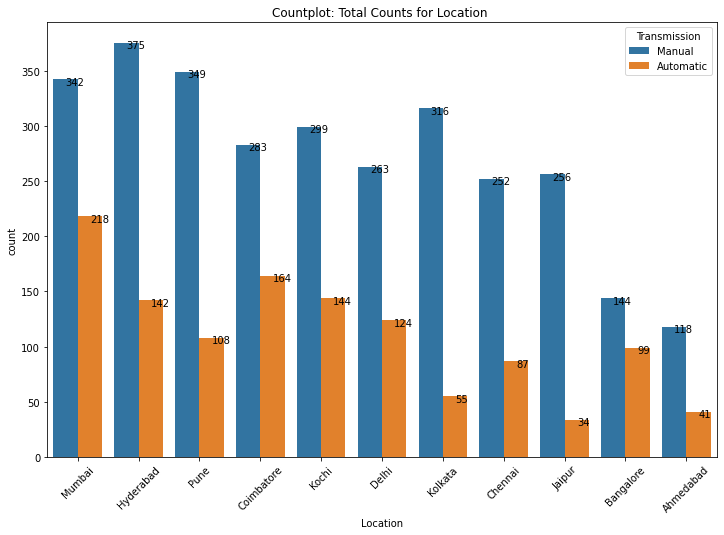

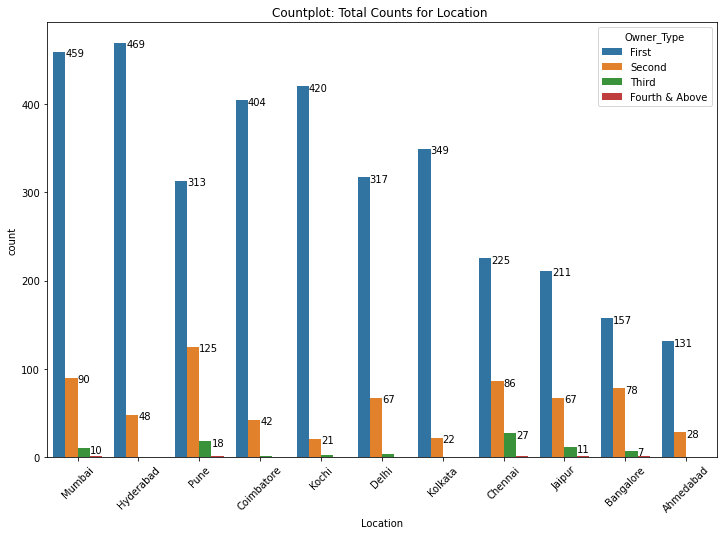

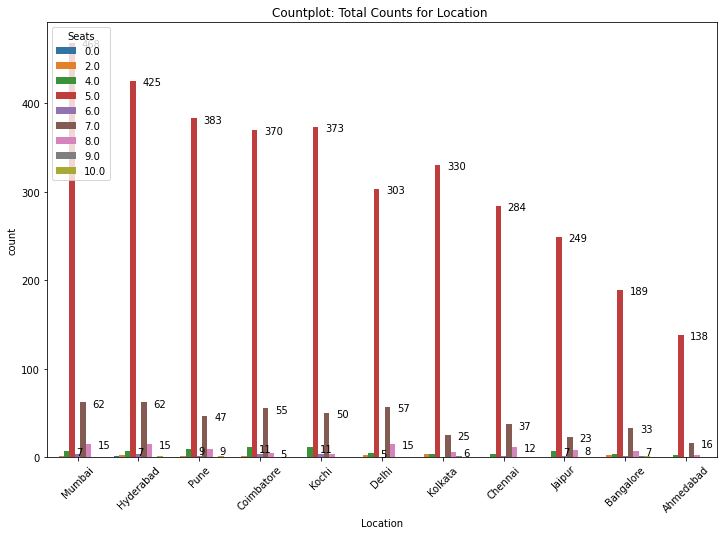

In [41]:
# Use Countplot to see the distribution of Location

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
plt.xticks(rotation=45)
ax = sns.countplot(data=df_train,x=Temp_v, order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
plt.xticks(rotation=45)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Fuel_Type', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
plt.xticks(rotation=45)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Transmission', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
plt.xticks(rotation=45)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Owner_Type', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
plt.xticks(rotation=45)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Seats', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

In [42]:
# Checking for missing value counts

df_train[Temp_v].isnull().sum()

0

In [43]:
del Temp_v

Observations for Location
1. Mumbai has the highest records in the dataset, followed by Hyderabad and then Pune
2. In most cities, diesel cars have more records, except in Mumbai, Pune, Kochi and Kolkata
3. Most of the cars that are sold (per dataset) are pre-owned by 1 owner only
4. No missing values

### 10a.2. Year

In [44]:
# Checking for missing value counts

df_train['Year'].isnull().sum()

0

In [45]:
# Age of the car really is the relevant feature rather than year when the car was made
# New feature created

df_train['FE_Age_Of_Car'] = dt.date.today().year - df_train['Year']

In [46]:
Temp_v = 'FE_Age_Of_Car'

In [47]:
# Drop the feature Year

df_train.drop('Year', axis=1, inplace=True)

In [48]:
df_train.sample(10, random_state=1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car
5753,Nissan Terrano XL Plus 85 PS,Jaipur,60000,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.00,16.65,6.00,8
661,Hyundai Grand i10 CRDi Sportz,Jaipur,64000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.00,7.45,4.15,8
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,55339,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.00,10.15,2.65,10
2612,BMW 3 Series 320d Prestige,Chennai,70000,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.00,54.43,17.55,8
2549,Maruti Swift Dzire VXI,Pune,68218,Petrol,Manual,First,19.1 kmpl,1197 CC,85.8 bhp,5.00,7.88,4.90,8
3030,BMW 3 Series 320d Sport,Mumbai,37000,Diesel,Automatic,Third,22.69 kmpl,1995 CC,190 bhp,5.00,54.43,15.00,10
1304,Hyundai i20 Magna Optional 1.2,Delhi,63777,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.00,10.25,3.67,9
4223,BMW X6 xDrive30d,Coimbatore,39626,Diesel,Automatic,First,11.2 kmpl,2993 CC,241 bhp,4.00,55.07,40.66,8
3187,Volkswagen Vento Diesel Highline,Chennai,150000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,5.00,9
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,62000,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.00,24.01,7.75,10


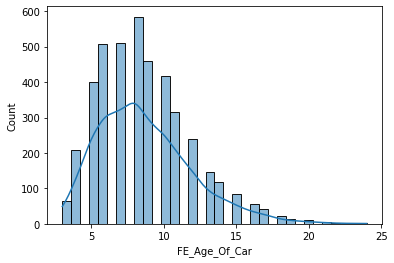

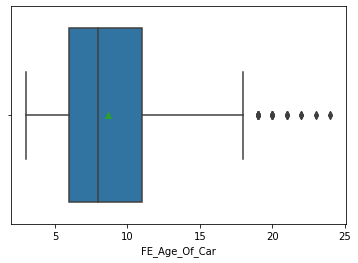

In [49]:
# Use histplot and boxplot to see the distribution of FE_Age_Of_Car

sns.histplot(data=df_train,x=Temp_v, kde=True)
plt.show()

sns.boxplot(data=df_train,x=Temp_v, showmeans=True)
plt.show()

In [50]:
# Checking for missing value counts

df_train[Temp_v].isnull().sum()

0

In [51]:
# Check on Outliers 

Temp_q1_FE_Age_Of_Car = df_train[Temp_v].quantile(0.25)
Temp_q2_FE_Age_Of_Car = df_train[Temp_v].quantile(0.5) #median
Temp_q3_FE_Age_Of_Car = df_train[Temp_v].quantile(0.75)
Temp_iqr_FE_Age_Of_Car=Temp_q3_FE_Age_Of_Car-Temp_q1_FE_Age_Of_Car

print('Median for' , Temp_v , 'is: ', Temp_q2_FE_Age_Of_Car)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_FE_Age_Of_Car)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_FE_Age_Of_Car)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_FE_Age_Of_Car, '\n')

Median for FE_Age_Of_Car is:  8.0
1st Quartile for FE_Age_Of_Car is:  6.0
3rd Quartile for FE_Age_Of_Car is:  11.0
IQR for FE_Age_Of_Car is:  5.0 



In [52]:
# Check on Outliers  

Temp_upper_whisker_FE_Age_Of_Car = Temp_q3_FE_Age_Of_Car + (1.5 * Temp_iqr_FE_Age_Of_Car)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_FE_Age_Of_Car, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Age_Of_Car].value_counts().sum()

Upper Whisker for FE_Age_Of_Car is:  18.5 

Records above Upper Whisker are 



29

In [53]:
del Temp_v

Observations for Year

1. Most of the years have more First owned cars than any other type of ownership, except for couple of years, Example is 2008

### 10a.3. Fuel_Type

In [54]:
Temp_v='Fuel_Type'

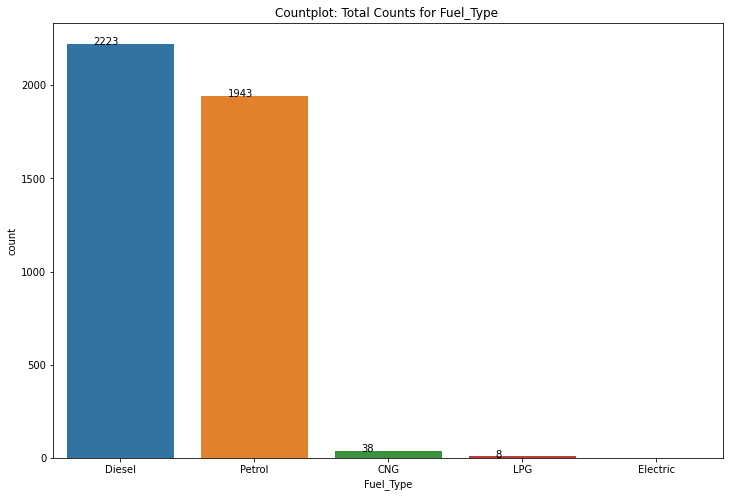

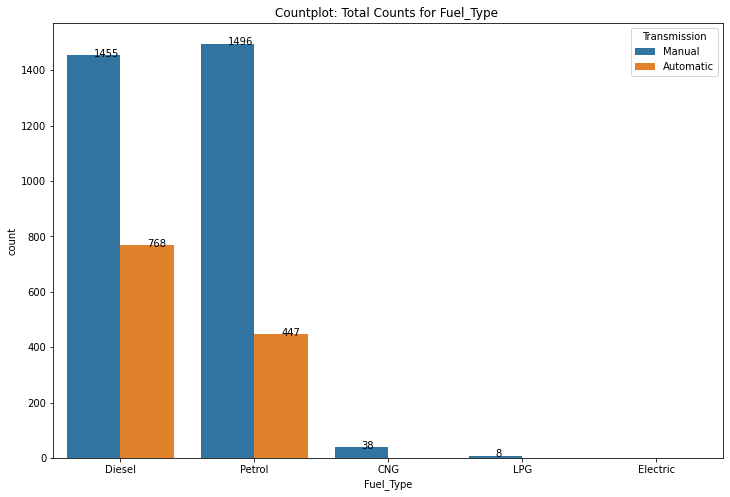

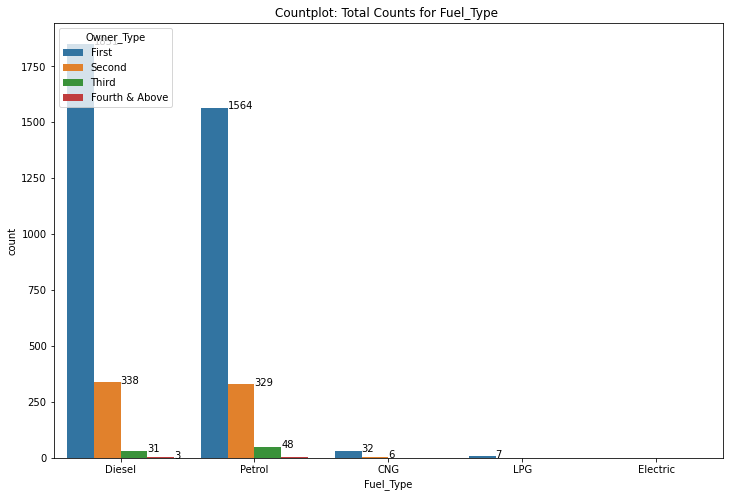

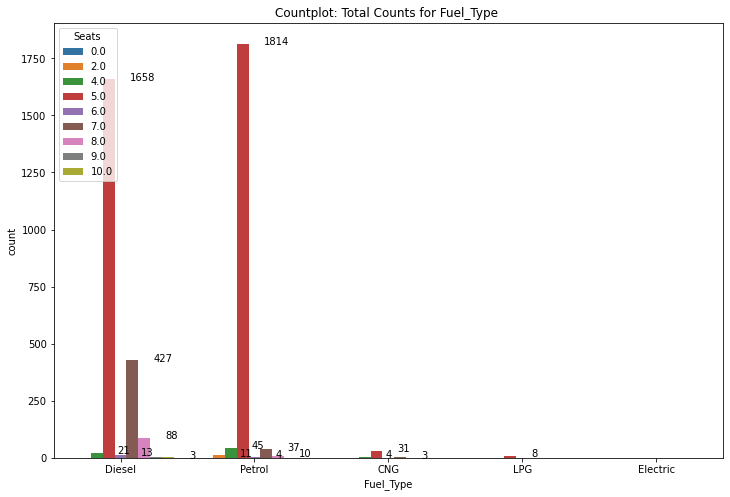

In [55]:
# Use Countplot to see the distribution of Fuel_Type

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Transmission', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Owner_Type', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, hue = 'Seats', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

In [56]:
# Checking for missing value counts

df_train[Temp_v].isnull().sum()

0

In [57]:
del Temp_v

Observations for Fuel_Type

1. Majority of the cars are either Petrol or Diesel. Negligible CNG / LPG or Electric cars
2. Automatic transmission cars are Petrol or Diesel only
3. Most of the 7 Seater cars are Diesel

### 10a.4. Transmission

In [58]:
Temp_v='Transmission'

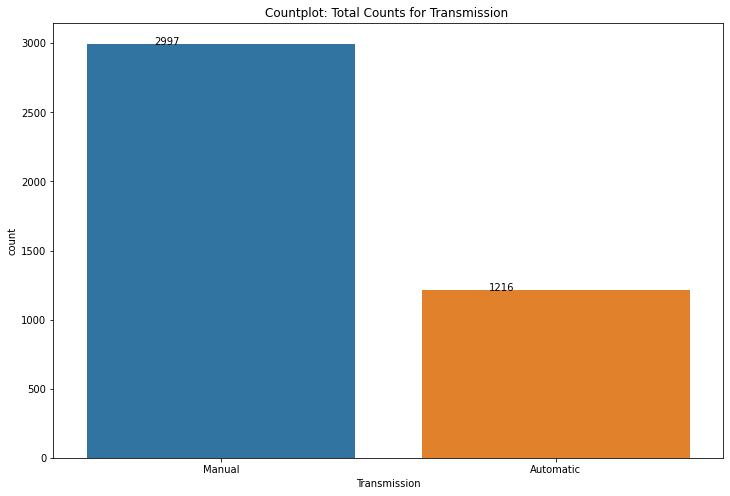

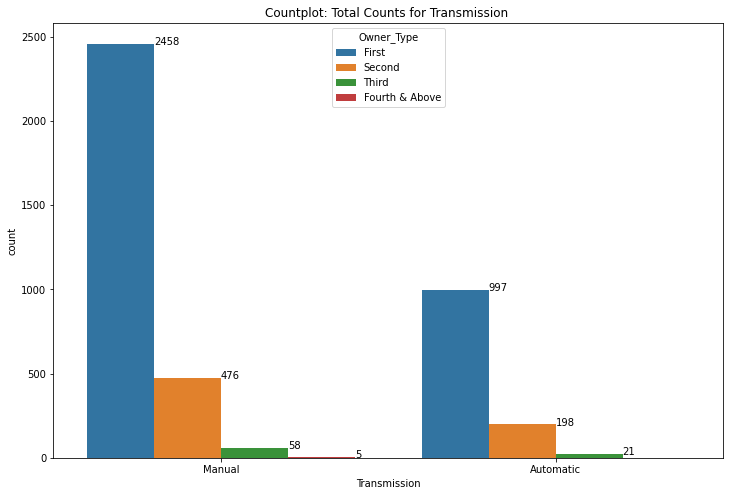

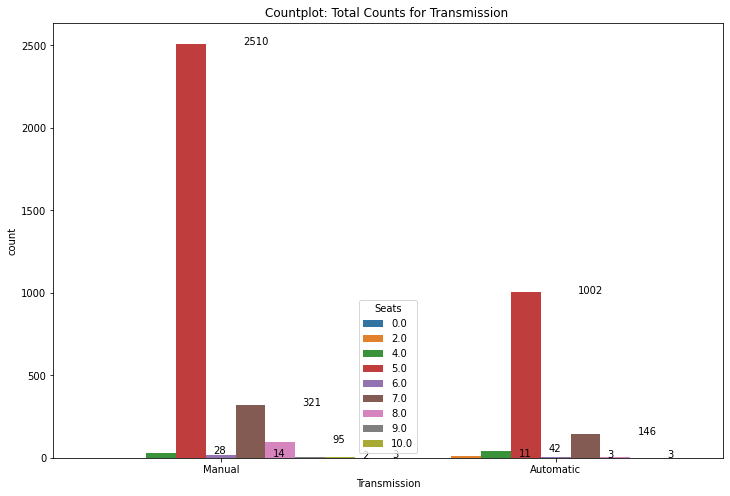

In [59]:
# Use Countplot to see the distribution of Transmission

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Owner_Type', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Seats', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()


In [60]:
# Checking for missing value counts

df_train[Temp_v].isnull().sum()

0

In [61]:
del Temp_v

Observations for Transmission

1. Manual transmission cars are more than Automatic

### 10a.5. Owner_Type

In [62]:
Temp_v ='Owner_Type'

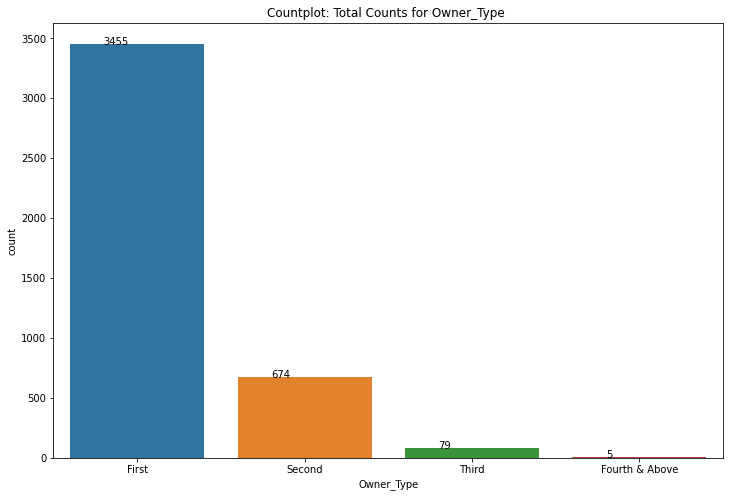

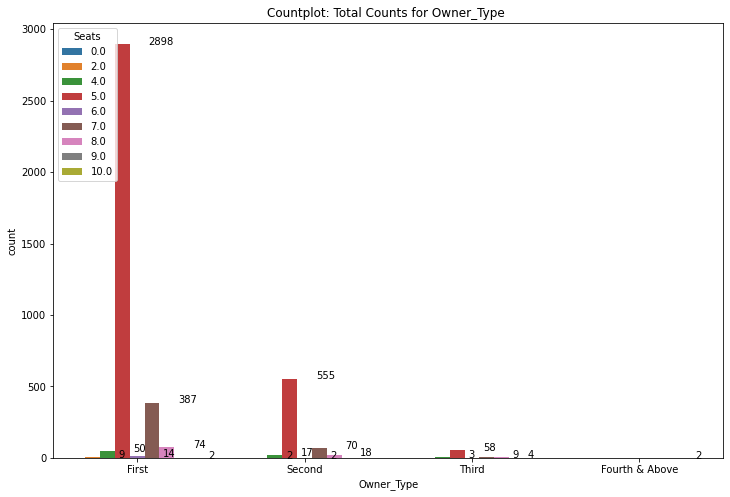

In [63]:
# Use Countplot to see the distribution of Owner_Type

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

plt.figure(figsize=(12,8))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, hue='Seats', order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

In [64]:
# Checking for missing value counts

df_train[Temp_v].isnull().sum()

0

In [65]:
del Temp_v

Observations for Owner_Type

1. Majority of the cars available are pre-owned by one owner

### 10a.6. Seats

In [66]:
Temp_v='Seats'

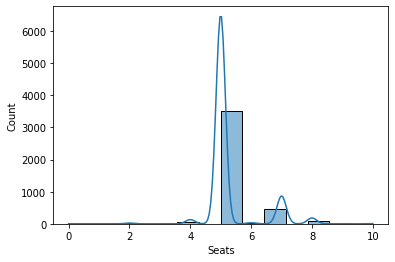

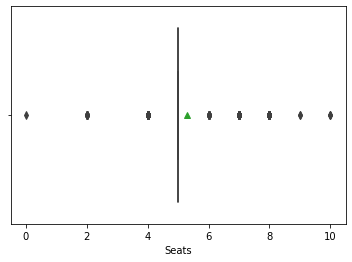

In [67]:
# Use histplot and boxplot to see the distribution of Seats

sns.histplot(data=df_train,x=Temp_v, kde=True)
plt.show()

sns.boxplot(data=df_train,x=Temp_v, showmeans=True)
plt.show()

In [68]:
# Checking for missing value counts

df_train[Temp_v].isnull().sum()

31

In [69]:
# Check records with missing Seats

df_train[df_train[Temp_v].isnull()]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car
1385,Honda City 1.5 GXI,Pune,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.58,1.50,18
1294,Honda City 1.3 DX,Delhi,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.58,3.20,13
4577,BMW 5 Series 520d Sedan,Delhi,72000,Diesel,Automatic,Third,18.48 kmpl,NaN,NaN,NaN,67.87,13.85,10
2737,Maruti Wagon R Vx,Jaipur,200000,Petrol,Manual,First,12.0 kmpl,NaN,NaN,NaN,5.51,0.70,21
4152,Land Rover Range Rover 3.0 D,Mumbai,75000,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.00,16.11,19
194,Honda City 1.5 GXI,Ahmedabad,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.58,2.95,15
2780,Hyundai Santro GLS II - Euro II,Pune,100000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,4.55,1.60,13
2369,Maruti Estilo LXI,Chennai,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,NaN,NaN,7.88,1.50,14
2325,Maruti Swift 1.3 VXI ABS,Pune,67000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.88,4.70,7
2623,BMW 5 Series 520d Sedan,Pune,95000,Diesel,Automatic,Second,18.48 kmpl,NaN,NaN,NaN,67.87,18.00,10


In [70]:
del Temp_v

Observations for Seats

1. Most of the cars have 5 Seats, followed by 7 Seaters.

### 10a.7. Name

In [71]:
# Name has brand name, car model name and model variant name. For this exercise, we will extract only brand name

Temp_Brand = df_train['Name'].str.split(' ', n = 1, expand = True) 
Temp_Brand.head()

,0,1
4054,Hyundai,i20 Sportz 1.4 CRDi
538,Ford,Fiesta Classic 1.4 Duratorq CLXI
148,Audi,RS5 Coupe
5859,Toyota,Fortuner 4x2 Manual
4051,Toyota,Etios G


In [72]:
# Create a new feature, in lower case (for comparisons)

df_train['FE_Brand_Name'] = Temp_Brand[0].str.lower()

In [73]:
# Checking the list of unique brands
# Observed that there are some brands that are not extracted correctly. For example, Land probably Land Rover. However, that will not be relevant if record counts for those brands is not significant

Temp_Brand[0].unique()

array(['Hyundai', 'Ford', 'Audi', 'Toyota', 'Maruti', 'Honda', 'Renault',
       'Tata', 'Mercedes-Benz', 'Volkswagen', 'BMW', 'Mahindra', 'Jaguar',
       'Chevrolet', 'Skoda', 'Porsche', 'Nissan', 'Volvo', 'Land',
       'Mitsubishi', 'Fiat', 'Jeep', 'Force', 'Smart', 'Bentley', 'Mini',
       'Datsun', 'Ambassador', 'Isuzu', 'Lamborghini'], dtype=object)

In [74]:
df_train.sample(10, random_state=1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name
5753,Nissan Terrano XL Plus 85 PS,Jaipur,60000,Diesel,Manual,First,20.45 kmpl,1461 CC,83.8 bhp,5.00,16.65,6.00,8,nissan
661,Hyundai Grand i10 CRDi Sportz,Jaipur,64000,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.00,7.45,4.15,8,hyundai
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,55339,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.00,10.15,2.65,10,volkswagen
2612,BMW 3 Series 320d Prestige,Chennai,70000,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.00,54.43,17.55,8,bmw
2549,Maruti Swift Dzire VXI,Pune,68218,Petrol,Manual,First,19.1 kmpl,1197 CC,85.8 bhp,5.00,7.88,4.90,8,maruti
3030,BMW 3 Series 320d Sport,Mumbai,37000,Diesel,Automatic,Third,22.69 kmpl,1995 CC,190 bhp,5.00,54.43,15.00,10,bmw
1304,Hyundai i20 Magna Optional 1.2,Delhi,63777,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.00,10.25,3.67,9,hyundai
4223,BMW X6 xDrive30d,Coimbatore,39626,Diesel,Automatic,First,11.2 kmpl,2993 CC,241 bhp,4.00,55.07,40.66,8,bmw
3187,Volkswagen Vento Diesel Highline,Chennai,150000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.00,13.23,5.00,9,volkswagen
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,62000,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.00,24.01,7.75,10,toyota


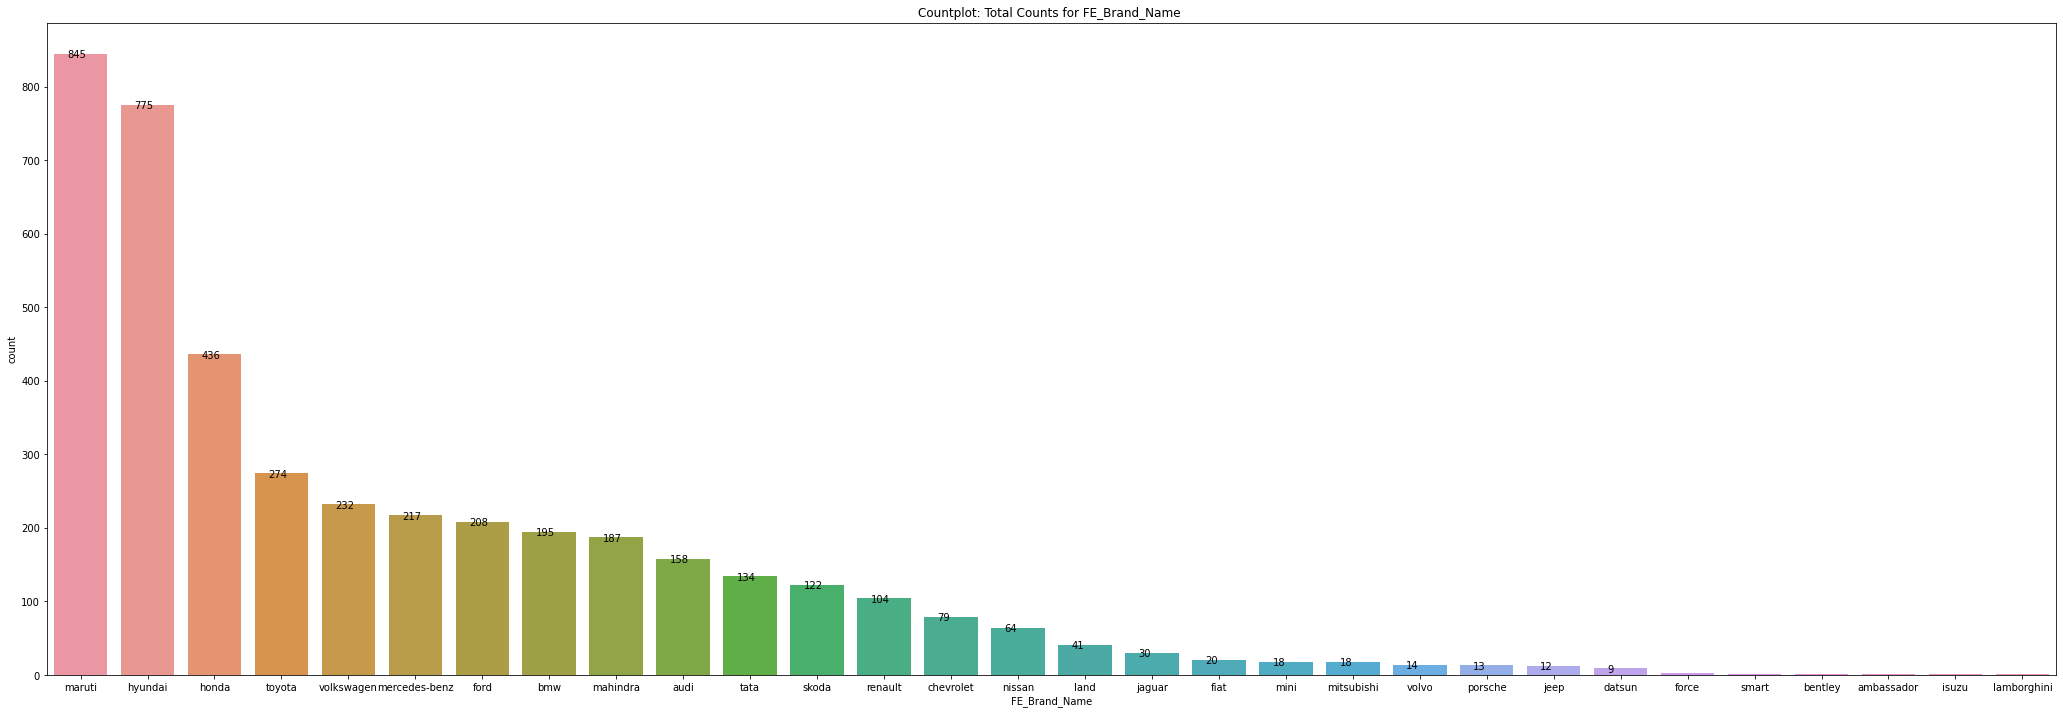

In [75]:
# Use Countplot to see the distribution of FE_Brand_Name

Temp_v='FE_Brand_Name'

plt.figure(figsize=(36,12))
plt.title(f'Countplot: Total Counts for {Temp_v} ')
plt.xlabel(Temp_v)
ax = sns.countplot(data=df_train,x=Temp_v, order=df_train[Temp_v].value_counts().index);
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5))
plt.show()

In [76]:
# Checking for missing value counts

df_train[Temp_v].isnull().sum()

0

In [77]:
# Checking number of records for each brand

df_train['FE_Brand_Name'].value_counts().sort_values(ascending=False)

maruti           845
hyundai          775
honda            436
toyota           274
volkswagen       232
mercedes-benz    217
ford             208
bmw              195
mahindra         187
audi             158
tata             134
skoda            122
renault          104
chevrolet         79
nissan            64
land              41
jaguar            30
fiat              20
mini              18
mitsubishi        18
volvo             14
porsche           13
jeep              12
datsun             9
force              3
smart              1
bentley            1
ambassador         1
isuzu              1
lamborghini        1
Name: FE_Brand_Name, dtype: int64

In [78]:
# Checking number of records for each brand

df_train.groupby('FE_Brand_Name')['Price'].sum().sort_values(ascending=False)

FE_Brand_Name
mercedes-benz   6028.90
bmw             4954.04
hyundai         4138.27
audi            3930.36
maruti          3795.42
toyota          3202.15
honda           2349.58
land            1705.86
mahindra        1509.75
ford            1452.45
volkswagen      1214.23
jaguar          1177.53
skoda            894.65
porsche          634.96
renault          576.71
mini             493.15
tata             489.13
nissan           292.79
volvo            256.88
chevrolet        241.73
jeep             228.28
mitsubishi       204.97
lamborghini      120.00
fiat              62.04
bentley           59.00
force             28.00
datsun            27.61
isuzu             20.00
smart              3.00
ambassador         1.35
Name: Price, dtype: float64

In [79]:
# extracting brand names

df_train['FE_Brand_Name'].value_counts().sort_values(ascending=False).index.str.lower()

Index(['maruti', 'hyundai', 'honda', 'toyota', 'volkswagen', 'mercedes-benz',
       'ford', 'bmw', 'mahindra', 'audi', 'tata', 'skoda', 'renault',
       'chevrolet', 'nissan', 'land', 'jaguar', 'fiat', 'mini', 'mitsubishi',
       'volvo', 'porsche', 'jeep', 'datsun', 'force', 'smart', 'bentley',
       'ambassador', 'isuzu', 'lamborghini'],
      dtype='object')

In [80]:
# There are too many brands, most with insignificant number of records. 
# Except brand names with records > 200 and some with significant sales like bmw & audi, all others will be clubbed with the name 'Others'

df_train['FE_Brand_Name'] = df_train['FE_Brand_Name'].replace(['mahindra', 'tata', 'skoda', 'renault',
       'chevrolet', 'nissan', 'land', 'jaguar', 'fiat', 'mini', 'mitsubishi',
       'volvo', 'porsche', 'jeep', 'datsun', 'force', 'smart', 'bentley',
       'ambassador', 'isuzu', 'lamborghini'], 'Others')


In [81]:
# Checking number of records for each brand again

df_train['FE_Brand_Name'].value_counts().sort_values(ascending=False)

Others           873
maruti           845
hyundai          775
honda            436
toyota           274
volkswagen       232
mercedes-benz    217
ford             208
bmw              195
audi             158
Name: FE_Brand_Name, dtype: int64

In [82]:
del Temp_Brand
del Temp_v

Observations for Name / FE_Brand_Name

1. Top brands are Maruti, Hyundai, Honda, Toyota

### 10a.8. Mileage

In [83]:
Temp_v = 'Mileage'

In [84]:
# Observed that Mileage had values consisting of Km/Kg as well as Kmpl,Checking counts for each. Need to separate magnitude and UoM

Temp_Mileage = df_train[Temp_v].str.split(' ', n = 1, expand = True) 
Temp_Mileage.columns = ['Mileage_Value', 'Mileage_UoM']
Temp_Mileage.sample(10, random_state=1)

,Mileage_Value,Mileage_UoM
5753,20.45,kmpl
661,24.0,kmpl
5577,22.07,kmpl
2612,18.88,kmpl
2549,19.1,kmpl
3030,22.69,kmpl
1304,18.5,kmpl
4223,11.2,kmpl
3187,20.54,kmpl
2463,12.99,kmpl


In [85]:
# Checking break down of Km/Kg and Kmpl

Temp_Mileage['Mileage_UoM'].value_counts()

kmpl     4166
km/kg      46
Name: Mileage_UoM, dtype: int64

In [86]:
# Check the info on the Temp dataframe 

Temp_Mileage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4054 to 1289
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Mileage_Value  4212 non-null   object
 1   Mileage_UoM    4212 non-null   object
dtypes: object(2)
memory usage: 227.8+ KB


In [87]:
# Checking top few records for km/kg before any conversion is done

Temp_Mileage[Temp_Mileage['Mileage_UoM'] == 'km/kg'].head()

,Mileage_Value,Mileage_UoM
5710,30.46,km/kg
5997,26.2,km/kg
5506,26.2,km/kg
5876,17.5,km/kg
5,21.1,km/kg


In [88]:
# Convert the datatype for Mileage_Value to float

Temp_Mileage['Mileage_Value'] = pd.to_numeric(Temp_Mileage['Mileage_Value'])

In [89]:
# Check the info on the Temp dataframe again

Temp_Mileage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4054 to 1289
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mileage_Value  4212 non-null   float64
 1   Mileage_UoM    4212 non-null   object 
dtypes: float64(1), object(1)
memory usage: 227.8+ KB


In [90]:
# Convert Km/Kg records to Kmpl so that UoM is consistent. Create another feature in the Temp dataframe

def kmkg_to_kmpl(val, uom):
    """Function to convert Mileage records from Km/Kg to kmpl."""
    if uom == 'km/kg':
      multiplier = 1 #Per advice in project FAQs. If needed, multiplier of 1.96 can be used, referenced internet for this conversion
    else:
      multiplier = 1
    return val * multiplier

Temp_Mileage['Converted_Mileage_Value']=Temp_Mileage[['Mileage_Value', 'Mileage_UoM']].apply(lambda x:kmkg_to_kmpl(x.Mileage_Value,x.Mileage_UoM), axis=1) 


In [91]:
# Confirm that values are calculated correctly when its km/kg

Temp_Mileage[Temp_Mileage['Mileage_UoM'] == 'km/kg'].head()

,Mileage_Value,Mileage_UoM,Converted_Mileage_Value
5710,30.46,km/kg,30.46
5997,26.20,km/kg,26.20
5506,26.20,km/kg,26.20
5876,17.50,km/kg,17.50
5,21.10,km/kg,21.10


In [92]:
# Confirm that values are unchanged when its kmpl

Temp_Mileage[Temp_Mileage['Mileage_UoM'] == 'kmpl'].head()

,Mileage_Value,Mileage_UoM,Converted_Mileage_Value
4054,22.54,kmpl,22.54
538,17.80,kmpl,17.80
148,11.05,kmpl,11.05
5859,13.00,kmpl,13.00
4051,16.78,kmpl,16.78


In [93]:
# Update the value for Mileage with only numeric part

df_train['FE_Mileage'] = Temp_Mileage['Converted_Mileage_Value']

In [94]:
df_train.head(10)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage
4054,Hyundai i20 Sportz 1.4 CRDi,Delhi,25500,Diesel,Manual,First,22.54 kmpl,1396 CC,88.73 bhp,5.00,10.25,7.00,5,hyundai,22.54
538,Ford Fiesta Classic 1.4 Duratorq CLXI,Hyderabad,107000,Diesel,Manual,First,17.8 kmpl,1399 CC,67 bhp,5.00,11.69,3.00,10,ford,17.80
148,Audi RS5 Coupe,Mumbai,23000,Petrol,Automatic,First,11.05 kmpl,2894 CC,444 bhp,4.00,128.00,37.00,9,audi,11.05
5859,Toyota Fortuner 4x2 Manual,Jaipur,73053,Diesel,Manual,First,13.0 kmpl,2982 CC,168.5 bhp,7.00,37.17,20.00,6,toyota,13.00
4051,Toyota Etios G,Delhi,70000,Petrol,Manual,First,16.78 kmpl,1496 CC,88.73 bhp,5.00,8.53,3.25,8,toyota,16.78
2714,Hyundai i20 Active 1.2 SX Dual Tone,Pune,6000,Petrol,Manual,First,17.19 kmpl,1197 CC,81.86 bhp,5.00,10.25,7.25,6,hyundai,17.19
5710,Maruti Alto 800 CNG LXI,Mumbai,26200,CNG,Manual,First,30.46 km/kg,796 CC,47.3 bhp,5.00,4.36,2.15,9,maruti,30.46
5240,Honda City 1.5 V MT Exclusive,Kochi,50266,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.00,13.58,5.53,9,honda,17.00
1381,Renault Duster 110PS Diesel RxZ AMT,Bangalore,45000,Diesel,Automatic,First,19.6 kmpl,1461 CC,108.45 bhp,5.00,15.05,11.50,6,Others,19.60
1041,Maruti Swift VXI,Coimbatore,61110,Petrol,Manual,First,18.6 kmpl,1197 CC,85.8 bhp,5.00,7.88,4.57,9,maruti,18.60


In [95]:
# Change the data type of FE_Mileage to float

df_train['FE_Mileage'] = pd.to_numeric(df_train['FE_Mileage'])

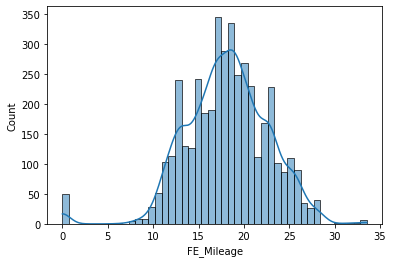

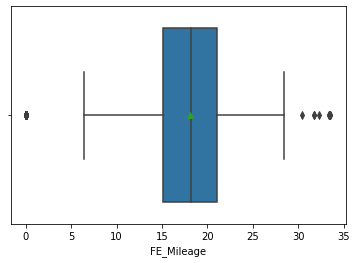

In [96]:
# Use histplot and boxplot to see the distribution of FE_Mileage

sns.histplot(data=df_train,x='FE_Mileage', kde=True)
plt.show()

sns.boxplot(data=df_train,x='FE_Mileage', showmeans=True)
plt.show()

In [97]:
# Check on Outliers for FE_Mileage

Temp_v = 'FE_Mileage'
Temp_q1_FE_Mileage = df_train[Temp_v].quantile(0.25)
Temp_q2_FE_Mileage = df_train[Temp_v].quantile(0.5)
Temp_q3_FE_Mileage = df_train[Temp_v].quantile(0.75)
Temp_iqr_FE_Mileage=Temp_q3_FE_Mileage-Temp_q1_FE_Mileage

print('Median for' , Temp_v , 'is: ', Temp_q2_FE_Mileage)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_FE_Mileage)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_FE_Mileage)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_FE_Mileage, '\n')

Median for FE_Mileage is:  18.2
1st Quartile for FE_Mileage is:  15.1
3rd Quartile for FE_Mileage is:  21.1
IQR for FE_Mileage is:  6.000000000000002 



In [98]:
# Check on upper outliers

Temp_upper_whisker_FE_Mileage = Temp_q3_FE_Mileage + (1.5 * Temp_iqr_FE_Mileage)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_FE_Mileage, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Mileage]

Upper Whisker for FE_Mileage is:  30.100000000000005 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage
5710,Maruti Alto 800 CNG LXI,Mumbai,26200,CNG,Manual,First,30.46 km/kg,796 CC,47.3 bhp,5.00,4.36,2.15,9,maruti,30.46
5935,Maruti Alto K10 LXI CNG,Pune,59525,CNG,Manual,Second,32.26 km/kg,998 CC,58.2 bhp,4.00,4.36,3.10,7,maruti,32.26
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,65537,CNG,Manual,Second,33.44 km/kg,796 CC,40.3 bhp,4.00,4.36,2.10,10,maruti,33.44
2701,Maruti Celerio CNG VXI MT,Kochi,70536,CNG,Manual,First,31.79 km/kg,998 CC,58.33 bhp,5.00,5.87,4.58,6,maruti,31.79
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,18000,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.00,4.36,3.00,7,maruti,33.44
5178,Maruti Celerio CNG VXI MT,Delhi,64687,CNG,Manual,First,31.79 km/kg,998 CC,58.33 bhp,5.00,5.87,3.80,7,maruti,31.79
2371,Maruti Wagon R CNG LXI,Pune,29202,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.00,5.54,3.90,8,maruti,33.54
3129,Maruti Wagon R CNG LXI,Delhi,74663,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.00,5.35,3.25,8,maruti,33.54
1332,Maruti Wagon R CNG LXI,Pune,79494,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.00,5.54,2.96,9,maruti,33.54
4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,24310,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.00,4.36,3.70,5,maruti,33.44


In [99]:
# Check on missing values 

df_train[df_train[Temp_v].isnull()]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage
4446,Mahindra E Verito D4,Chennai,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.00,13.58,13.00,6,Others,NaN


In [100]:
# Check on lower outliers

Temp_lower_whisker_FE_Mileage = Temp_q1_FE_Mileage - (1.5 * Temp_iqr_FE_Mileage)

print('Lower Whisker for', Temp_v , 'is: ', Temp_lower_whisker_FE_Mileage, '\n')
print('Records below Lower Whisker are \n')
df_train[df_train[Temp_v] < Temp_lower_whisker_FE_Mileage]

Lower Whisker for FE_Mileage is:  6.099999999999996 

Records below Lower Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage
1385,Honda City 1.5 GXI,Pune,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.58,1.50,18,honda,0.00
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,53000,Petrol,Automatic,First,0.0 kmpl,3597 CC,262.6 bhp,5.00,33.36,4.75,13,Others,0.00
5426,Hyundai Santro Xing XL,Chennai,85000,Petrol,Manual,Third,0.0 kmpl,1086 CC,NaN,5.00,4.55,1.30,16,hyundai,0.00
1059,Hyundai Santro Xing GL,Hyderabad,58163,Petrol,Manual,First,0.0 kmpl,1086 CC,62 bhp,5.00,4.55,2.45,12,hyundai,0.00
3189,Hyundai Santro GS zipDrive - Euro II,Chennai,67000,Petrol,Manual,Third,0.0 kmpl,999 CC,NaN,5.00,4.55,1.20,20,hyundai,0.00
915,Smart Fortwo CDI AT,Pune,103000,Diesel,Automatic,Second,0.0 kmpl,799 CC,NaN,2.00,11.30,3.00,14,Others,0.00
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,8682,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.00,52.26,39.50,4,mercedes-benz,0.00
5311,Land Rover Freelander 2 TD4 SE,Hyderabad,139000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.00,120.00,16.75,10,Others,0.00
4687,Land Rover Freelander 2 TD4 SE,Jaipur,119203,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.00,120.00,16.50,10,Others,0.00
4152,Land Rover Range Rover 3.0 D,Mumbai,75000,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.00,16.11,19,Others,0.00


In [101]:
# Drop Mileage column from the TRAIN set

df_train.drop('Mileage', axis=1, inplace=True)

In [102]:
del Temp_v
del Temp_Mileage

Significant number of outliers. Also observed that some records have 0.00 mileage, which is obviously not correct

### 10a.9. Engine

In [103]:
# Engine values have CC suffixed, need to separate magnitude (value) and UoM

Temp_Engine = df_train['Engine'].str.split(' ', n = 1, expand = True) 
Temp_Engine.head()

,0,1
4054,1396,CC
538,1399,CC
148,2894,CC
5859,2982,CC
4051,1496,CC


In [104]:
# checking if there are multiple UoM, that will require data conversion

Temp_Engine[1].value_counts()

CC    4185
Name: 1, dtype: int64

In [105]:
# Create a new feature in the TRAIN dataset, with only numeric part of Engine. Feature name indicates the UOM

df_train['FE_Engine_In_CC'] = Temp_Engine[0]

In [106]:
df_train.sample(10, random_state=1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC
5753,Nissan Terrano XL Plus 85 PS,Jaipur,60000,Diesel,Manual,First,1461 CC,83.8 bhp,5.00,16.65,6.00,8,Others,20.45,1461
661,Hyundai Grand i10 CRDi Sportz,Jaipur,64000,Diesel,Manual,First,1120 CC,70 bhp,5.00,7.45,4.15,8,hyundai,24.00,1120
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,55339,Diesel,Manual,First,1199 CC,73.9 bhp,5.00,10.15,2.65,10,volkswagen,22.07,1199
2612,BMW 3 Series 320d Prestige,Chennai,70000,Diesel,Automatic,First,1995 CC,184 bhp,5.00,54.43,17.55,8,bmw,18.88,1995
2549,Maruti Swift Dzire VXI,Pune,68218,Petrol,Manual,First,1197 CC,85.8 bhp,5.00,7.88,4.90,8,maruti,19.10,1197
3030,BMW 3 Series 320d Sport,Mumbai,37000,Diesel,Automatic,Third,1995 CC,190 bhp,5.00,54.43,15.00,10,bmw,22.69,1995
1304,Hyundai i20 Magna Optional 1.2,Delhi,63777,Petrol,Manual,First,1197 CC,82.9 bhp,5.00,10.25,3.67,9,hyundai,18.50,1197
4223,BMW X6 xDrive30d,Coimbatore,39626,Diesel,Automatic,First,2993 CC,241 bhp,4.00,55.07,40.66,8,bmw,11.20,2993
3187,Volkswagen Vento Diesel Highline,Chennai,150000,Diesel,Manual,First,1598 CC,103.6 bhp,5.00,13.23,5.00,9,volkswagen,20.54,1598
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,62000,Diesel,Manual,First,2494 CC,100 bhp,7.00,24.01,7.75,10,toyota,12.99,2494


In [107]:
# Change the data type to float

df_train['FE_Engine_In_CC'] = pd.to_numeric(df_train['FE_Engine_In_CC'])

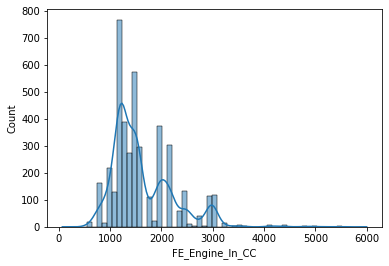

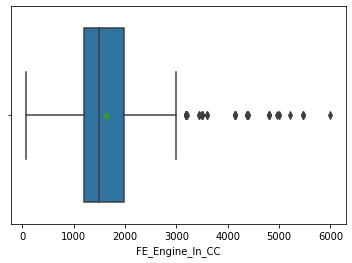

In [108]:
# Use histplot and boxplot to see the distribution

sns.histplot(data=df_train,x='FE_Engine_In_CC', kde=True)
plt.show()

sns.boxplot(data=df_train,x='FE_Engine_In_CC', showmeans=True)
plt.show()

In [109]:
# Check on Outliers for FE_Engine_In_CC

Temp_v = 'FE_Engine_In_CC'
Temp_q1_FE_Engine_In_CC = df_train[Temp_v].quantile(0.25)
Temp_q2_FE_Engine_In_CC = df_train[Temp_v].quantile(0.5)
Temp_q3_FE_Engine_In_CC = df_train[Temp_v].quantile(0.75)
Temp_iqr_FE_Engine_In_CC=Temp_q3_FE_Engine_In_CC-Temp_q1_FE_Engine_In_CC

print('Median for' , Temp_v , 'is: ', Temp_q2_FE_Engine_In_CC)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_FE_Engine_In_CC)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_FE_Engine_In_CC)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_FE_Engine_In_CC, '\n')

Median for FE_Engine_In_CC is:  1493.0
1st Quartile for FE_Engine_In_CC is:  1198.0
3rd Quartile for FE_Engine_In_CC is:  1984.0
IQR for FE_Engine_In_CC is:  786.0 



In [110]:
# Check on upper outliers

Temp_upper_whisker_FE_Engine_In_CC= Temp_q3_FE_Engine_In_CC + (1.5 * Temp_iqr_FE_Engine_In_CC)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_FE_Engine_In_CC, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Engine_In_CC]

Upper Whisker for FE_Engine_In_CC is:  3163.0 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,53000,Petrol,Automatic,First,3597 CC,262.6 bhp,5.00,33.36,4.75,13,Others,0.00,3597.00
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,10000,Petrol,Automatic,First,3498 CC,306 bhp,2.00,49.49,55.00,7,mercedes-benz,18.10,3498.00
2669,Ford Endeavour 3.2 Trend AT 4X4,Coimbatore,51530,Diesel,Automatic,First,3198 CC,197.2 bhp,7.00,35.29,30.27,4,ford,10.91,3198.00
4388,Audi Q7 4.2 TDI Quattro Technology,Bangalore,50000,Diesel,Automatic,First,4134 CC,335.2 bhp,7.00,101.96,48.00,7,audi,11.33,4134.00
4821,BMW 6 Series 630i Coupe,Mumbai,5900,Petrol,Automatic,First,4395 CC,450 bhp,4.00,55.07,47.50,11,bmw,7.94,4395.00
5521,Bentley Continental Flying Spur,Hyderabad,48000,Petrol,Automatic,First,5998 CC,552 bhp,4.00,375.00,59.00,16,Others,8.60,5998.00
5414,Mercedes-Benz R-Class R350 4Matic Long,Kochi,45710,Petrol,Automatic,First,3498 CC,272 bhp,7.00,49.49,23.68,8,mercedes-benz,11.80,3498.00
3079,Ford Endeavour 3.2 Titanium AT 4X4,Mumbai,29000,Diesel,Automatic,First,3198 CC,197 bhp,7.00,35.29,29.80,6,ford,10.91,3198.00
4906,Ford Endeavour 3.2 Titanium AT 4X4,Hyderabad,15000,Diesel,Automatic,First,3198 CC,197 bhp,7.00,35.29,33.00,4,ford,10.91,3198.00
2681,Skoda Superb 3.6 V6 FSI,Hyderabad,54000,Petrol,Automatic,First,3597 CC,262.6 bhp,5.00,33.36,6.00,12,Others,0.00,3597.00


In [111]:
# Check on missing values 

df_train['FE_Engine_In_CC'].isnull().sum()

28

In [112]:
# Drop Mileage column from the TRAIN set

df_train.drop('Engine', axis=1, inplace=True)

In [113]:
del Temp_Engine
del Temp_v

### 10a.10. Power

In [114]:
# Like other features, separate magnitude and UOM

Temp_Power = df_train['Power'].str.split(' ', n = 1, expand = True) 
Temp_Power.head()

,0,1
4054,88.73,bhp
538,67,bhp
148,444,bhp
5859,168.5,bhp
4051,88.73,bhp


In [115]:
# checking if there are more than 1 UoMs

Temp_Power[1].value_counts()

bhp    4108
Name: 1, dtype: int64

In [116]:
# Create a new feature

df_train['FE_Power_Bhp'] = Temp_Power[0]

In [117]:
df_train.sample(10, random_state=1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
5753,Nissan Terrano XL Plus 85 PS,Jaipur,60000,Diesel,Manual,First,83.8 bhp,5.00,16.65,6.00,8,Others,20.45,1461.00,83.8
661,Hyundai Grand i10 CRDi Sportz,Jaipur,64000,Diesel,Manual,First,70 bhp,5.00,7.45,4.15,8,hyundai,24.00,1120.00,70
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,55339,Diesel,Manual,First,73.9 bhp,5.00,10.15,2.65,10,volkswagen,22.07,1199.00,73.9
2612,BMW 3 Series 320d Prestige,Chennai,70000,Diesel,Automatic,First,184 bhp,5.00,54.43,17.55,8,bmw,18.88,1995.00,184
2549,Maruti Swift Dzire VXI,Pune,68218,Petrol,Manual,First,85.8 bhp,5.00,7.88,4.90,8,maruti,19.10,1197.00,85.8
3030,BMW 3 Series 320d Sport,Mumbai,37000,Diesel,Automatic,Third,190 bhp,5.00,54.43,15.00,10,bmw,22.69,1995.00,190
1304,Hyundai i20 Magna Optional 1.2,Delhi,63777,Petrol,Manual,First,82.9 bhp,5.00,10.25,3.67,9,hyundai,18.50,1197.00,82.9
4223,BMW X6 xDrive30d,Coimbatore,39626,Diesel,Automatic,First,241 bhp,4.00,55.07,40.66,8,bmw,11.20,2993.00,241
3187,Volkswagen Vento Diesel Highline,Chennai,150000,Diesel,Manual,First,103.6 bhp,5.00,13.23,5.00,9,volkswagen,20.54,1598.00,103.6
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,62000,Diesel,Manual,First,100 bhp,7.00,24.01,7.75,10,toyota,12.99,2494.00,100


In [118]:
# Change the data type of FE_Mileage to float

df_train['FE_Power_Bhp'] = pd.to_numeric(df_train['FE_Power_Bhp'])

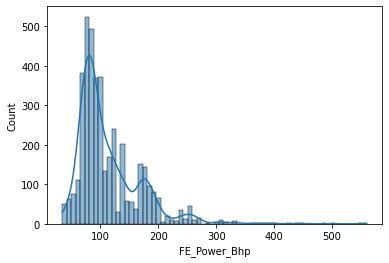

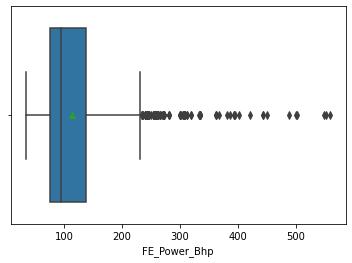

In [119]:
# Use histplot and boxplot to see the distribution of FE_Power_Bhp

sns.histplot(data=df_train,x='FE_Power_Bhp', kde=True)
plt.show()

sns.boxplot(data=df_train,x='FE_Power_Bhp', showmeans=True)
plt.show()

In [120]:
# Check on Outliers for FE_Power_Bhp

Temp_v = 'FE_Power_Bhp'
Temp_q1_FE_Power_Bhp = df_train[Temp_v].quantile(0.25)
Temp_q2_FE_Power_Bhp = df_train[Temp_v].quantile(0.5)
Temp_q3_FE_Power_Bhp = df_train[Temp_v].quantile(0.75)
Temp_iqr_FE_Power_Bhp = Temp_q3_FE_Power_Bhp - Temp_q1_FE_Power_Bhp

print('Median for' , Temp_v , 'is: ', Temp_q2_FE_Power_Bhp)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_FE_Power_Bhp)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_FE_Power_Bhp)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_FE_Power_Bhp, '\n')

Median for FE_Power_Bhp is:  94.0
1st Quartile for FE_Power_Bhp is:  75.705
3rd Quartile for FE_Power_Bhp is:  138.1
IQR for FE_Power_Bhp is:  62.394999999999996 



In [121]:
# Check on upper outliers

Temp_upper_whisker_FE_Power_Bhp = Temp_q3_FE_Power_Bhp + (1.5 * Temp_iqr_FE_Power_Bhp)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_FE_Power_Bhp, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Power_Bhp]

Upper Whisker for FE_Power_Bhp is:  231.6925 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
148,Audi RS5 Coupe,Mumbai,23000,Petrol,Automatic,First,444 bhp,4.00,128.00,37.00,9,audi,11.05,2894.00,444.00
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,53000,Petrol,Automatic,First,262.6 bhp,5.00,33.36,4.75,13,Others,0.00,3597.00,262.60
1496,Jaguar XJ 3.0L Portfolio LWB,Kochi,17652,Diesel,Automatic,First,270.88 bhp,5.00,69.67,58.73,6,Others,12.90,2993.00,270.88
5512,Porsche Cayenne 2009-2014 Diesel,Kochi,47877,Diesel,Automatic,First,240 bhp,5.00,136.00,48.22,7,Others,15.15,2967.00,240.00
5294,BMW Z4 2009-2013 35i,Delhi,25000,Petrol,Automatic,First,306 bhp,2.00,55.07,30.00,11,bmw,10.37,2979.00,306.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,BMW 7 Series 740Li,Bangalore,17465,Petrol,Automatic,First,320 bhp,5.00,158.00,93.00,5,bmw,12.05,2979.00,320.00
3488,Audi Q7 3.0 TDI quattro,Coimbatore,91743,Diesel,Automatic,First,241.4 bhp,7.00,101.96,28.55,10,audi,12.07,2967.00,241.40
2808,Mercedes-Benz GLE 350d,Mumbai,19863,Diesel,Automatic,First,254.79 bhp,5.00,91.23,64.95,5,mercedes-benz,11.57,2987.00,254.79
2654,BMW X5 3.0d,Coimbatore,101119,Diesel,Automatic,First,235 bhp,5.00,55.07,18.46,12,bmw,11.00,2993.00,235.00


In [122]:
# Check missing values 

df_train['FE_Power_Bhp'].isnull().sum()

105

In [123]:
# Drop Power column from the TRAIN set

df_train.drop('Power', axis=1, inplace=True)

In [124]:
df_train.sample(10, random_state=1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
5753,Nissan Terrano XL Plus 85 PS,Jaipur,60000,Diesel,Manual,First,5.00,16.65,6.00,8,Others,20.45,1461.00,83.80
661,Hyundai Grand i10 CRDi Sportz,Jaipur,64000,Diesel,Manual,First,5.00,7.45,4.15,8,hyundai,24.00,1120.00,70.00
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,55339,Diesel,Manual,First,5.00,10.15,2.65,10,volkswagen,22.07,1199.00,73.90
2612,BMW 3 Series 320d Prestige,Chennai,70000,Diesel,Automatic,First,5.00,54.43,17.55,8,bmw,18.88,1995.00,184.00
2549,Maruti Swift Dzire VXI,Pune,68218,Petrol,Manual,First,5.00,7.88,4.90,8,maruti,19.10,1197.00,85.80
3030,BMW 3 Series 320d Sport,Mumbai,37000,Diesel,Automatic,Third,5.00,54.43,15.00,10,bmw,22.69,1995.00,190.00
1304,Hyundai i20 Magna Optional 1.2,Delhi,63777,Petrol,Manual,First,5.00,10.25,3.67,9,hyundai,18.50,1197.00,82.90
4223,BMW X6 xDrive30d,Coimbatore,39626,Diesel,Automatic,First,4.00,55.07,40.66,8,bmw,11.20,2993.00,241.00
3187,Volkswagen Vento Diesel Highline,Chennai,150000,Diesel,Manual,First,5.00,13.23,5.00,9,volkswagen,20.54,1598.00,103.60
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,62000,Diesel,Manual,First,7.00,24.01,7.75,10,toyota,12.99,2494.00,100.00


In [125]:
del Temp_v
del Temp_Power

### 10a.11. Kilometers_Driven

In [126]:
Temp_v = 'Kilometers_Driven'

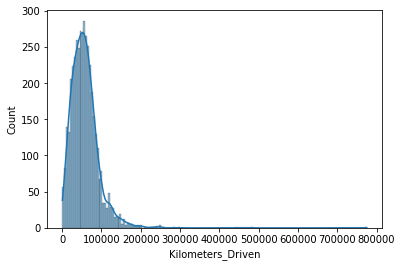

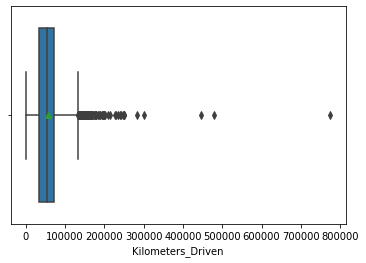

In [127]:
# Use histplot and boxplot to see the distribution

sns.histplot(data=df_train,x=Temp_v, kde=True)
plt.show()

sns.boxplot(data=df_train,x=Temp_v, showmeans=True)
plt.show()

In [128]:
# Check on Outliers for Kilometers_Driven

Temp_q1_Kilometers_Driven = df_train[Temp_v].quantile(0.25)
Temp_q2_Kilometers_Driven = df_train[Temp_v].quantile(0.5)
Temp_q3_Kilometers_Driven = df_train[Temp_v].quantile(0.75)
Temp_iqr_Kilometers_Driven = Temp_q3_Kilometers_Driven - Temp_q1_Kilometers_Driven

print('Median for' , Temp_v , 'is: ', Temp_q2_Kilometers_Driven)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Kilometers_Driven)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Kilometers_Driven)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Kilometers_Driven, '\n')

Median for Kilometers_Driven is:  53001.0
1st Quartile for Kilometers_Driven is:  34000.0
3rd Quartile for Kilometers_Driven is:  73314.0
IQR for Kilometers_Driven is:  39314.0 



In [129]:
# Check on outliers

Temp_upper_whisker_Kilometers_Driven = Temp_q3_Kilometers_Driven + (1.5 * Temp_iqr_Kilometers_Driven)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Kilometers_Driven, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_Kilometers_Driven]

Upper Whisker for Kilometers_Driven is:  132285.0 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
2910,Toyota Innova 2.5 V Diesel 8-seater,Hyderabad,135000,Diesel,Manual,Second,8.00,24.01,8.20,13,toyota,12.80,2494.00,102.00
5523,Toyota Innova 2.5 G4 Diesel 7-seater,Hyderabad,199000,Diesel,Manual,Second,7.00,24.01,5.20,15,toyota,12.80,2494.00,102.00
345,Tata Indica Vista Aqua 1.3 Quadrajet,Hyderabad,133944,Diesel,Manual,Second,5.00,7.63,3.50,8,Others,18.00,1248.00,75.00
664,Hyundai Verna CRDi SX,Jaipur,170000,Diesel,Manual,Second,5.00,14.26,1.50,14,hyundai,16.80,1493.00,110.00
469,Toyota Innova 2.5 VX (Diesel) 7 Seater,Hyderabad,162663,Diesel,Manual,First,7.00,24.01,10.50,10,toyota,12.99,2494.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,Tata Manza ELAN Quadrajet BS IV,Pune,148000,Diesel,Manual,Second,5.00,7.63,2.90,10,Others,21.12,1248.00,88.80
2182,Toyota Fortuner 2.8 4WD MT,Bangalore,150386,Diesel,Manual,First,7.00,39.60,23.00,7,toyota,14.24,2755.00,174.50
4491,Hyundai i20 Magna Optional 1.2,Bangalore,445000,Petrol,Manual,First,5.00,10.25,4.45,9,hyundai,18.50,1197.00,82.90
3435,Toyota Innova 2.0 E,Delhi,150000,Petrol,Manual,First,8.00,24.01,4.50,16,toyota,12.40,1998.00,132.00


In [130]:
# Check missing values

df_train['Kilometers_Driven'].isnull().sum()

0

In [131]:
del Temp_v

### 10a.12. New_Price

In [132]:
Temp_v = 'New_Price'

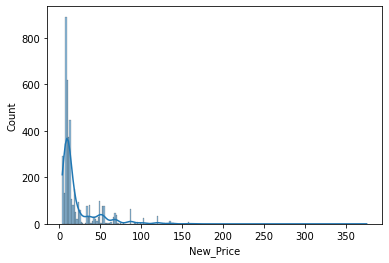

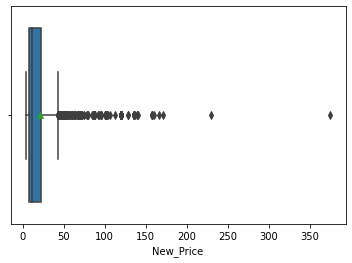

In [133]:
# Use histplot and boxplot to see the distribution of New_Price

sns.histplot(data=df_train,x=Temp_v, kde=True)
plt.show()

sns.boxplot(data=df_train,x=Temp_v, showmeans=True)
plt.show()

In [134]:
# Check on Outliers for New_Price

Temp_q1_New_Price = df_train[Temp_v].quantile(0.25)
Temp_q2_New_Price = df_train[Temp_v].quantile(0.5)
Temp_q3_New_Price = df_train[Temp_v].quantile(0.75)
Temp_iqr_New_Price = Temp_q3_New_Price - Temp_q1_New_Price

print('Median for' , Temp_v , 'is: ', Temp_q2_New_Price)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_New_Price)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_New_Price)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_New_Price, '\n')

Median for New_Price is:  11.3
1st Quartile for New_Price is:  7.88
3rd Quartile for New_Price is:  21.77
IQR for New_Price is:  13.89 



In [135]:
# Check on outliers

Temp_upper_whisker_New_Price = Temp_q3_New_Price + (4 * Temp_iqr_New_Price)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_New_Price, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_New_Price]

Upper Whisker for New_Price is:  77.33 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
148,Audi RS5 Coupe,Mumbai,23000,Petrol,Automatic,First,4.00,128.00,37.00,9,audi,11.05,2894.00,444.00
4800,Mercedes-Benz E-Class 2009-2013 E250 CDI Blue ...,Bangalore,48000,Diesel,Automatic,First,5.00,86.97,22.00,9,mercedes-benz,14.21,2143.00,203.00
5512,Porsche Cayenne 2009-2014 Diesel,Kochi,47877,Diesel,Automatic,First,5.00,136.00,48.22,7,Others,15.15,2967.00,240.00
786,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Delhi,70000,Diesel,Automatic,First,5.00,86.97,15.80,9,mercedes-benz,10.00,2148.00,170.00
489,Mercedes-Benz GLS 350d 4MATIC,Pune,129000,Diesel,Automatic,First,7.00,100.00,56.00,5,mercedes-benz,11.00,2987.00,258.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,BMW 7 Series 740Li,Bangalore,17465,Petrol,Automatic,First,5.00,158.00,93.00,5,bmw,12.05,2979.00,320.00
5477,Land Rover Range Rover HSE Dynamic,Kochi,52827,Diesel,Automatic,First,5.00,120.00,44.76,4,Others,12.70,2179.00,187.70
3488,Audi Q7 3.0 TDI quattro,Coimbatore,91743,Diesel,Automatic,First,7.00,101.96,28.55,10,audi,12.07,2967.00,241.40
2808,Mercedes-Benz GLE 350d,Mumbai,19863,Diesel,Automatic,First,5.00,91.23,64.95,5,mercedes-benz,11.57,2987.00,254.79


In [136]:
# Check missing values

df_train['New_Price'].isnull().sum()#

0

In [137]:
del Temp_v

### 10a.13. Price

In [138]:
Temp_v = 'Price'

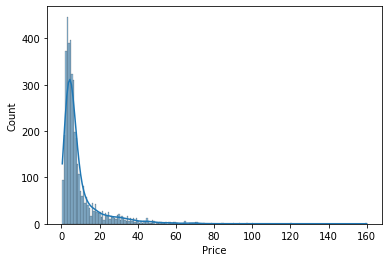

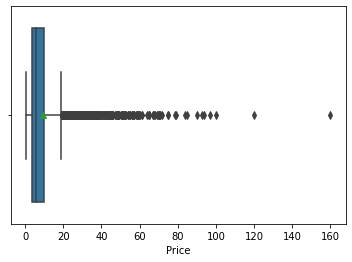

In [139]:
# Use histplot and boxplot to see the distribution of Price

sns.histplot(data=df_train,x=Temp_v, kde=True)
plt.show()

sns.boxplot(data=df_train,x=Temp_v, showmeans=True)
plt.show()

In [140]:
# Check on Outliers for Price

Temp_q1_Price = df_train[Temp_v].quantile(0.25)
Temp_q2_Price = df_train[Temp_v].quantile(0.5)
Temp_q3_Price = df_train[Temp_v].quantile(0.75)
Temp_iqr_Price = Temp_q3_Price - Temp_q1_Price

print('Median for' , Temp_v , 'is: ', Temp_q2_Price)
print('1st Quartile for' , Temp_v , 'is: ', Temp_q1_Price)
print('3rd Quartile for' , Temp_v,  'is: ', Temp_q3_Price)
print('IQR for' , Temp_v , 'is: ', Temp_iqr_Price, '\n')

Median for Price is:  5.5
1st Quartile for Price is:  3.5
3rd Quartile for Price is:  9.75
IQR for Price is:  6.25 



In [141]:
# Check on outliers

Temp_upper_whisker_Price = Temp_q3_Price + (1.5 * Temp_iqr_Price)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Price, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train['Price'] > Temp_upper_whisker_Price]

Upper Whisker for Price is:  19.125 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
148,Audi RS5 Coupe,Mumbai,23000,Petrol,Automatic,First,4.00,128.00,37.00,9,audi,11.05,2894.00,444.00
5859,Toyota Fortuner 4x2 Manual,Jaipur,73053,Diesel,Manual,First,7.00,37.17,20.00,6,toyota,13.00,2982.00,168.50
5122,Toyota Fortuner 4x2 Manual,Chennai,99000,Diesel,Manual,First,7.00,37.17,20.50,7,toyota,13.00,2982.00,168.50
4800,Mercedes-Benz E-Class 2009-2013 E250 CDI Blue ...,Bangalore,48000,Diesel,Automatic,First,5.00,86.97,22.00,9,mercedes-benz,14.21,2143.00,203.00
4513,Jaguar XF 2.2 Litre Executive,Bangalore,19000,Diesel,Automatic,Second,5.00,69.67,38.00,7,Others,16.36,2179.00,187.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,Mercedes-Benz GLE 350d,Mumbai,19863,Diesel,Automatic,First,5.00,91.23,64.95,5,mercedes-benz,11.57,2987.00,254.79
1828,BMW X1 xDrive 20d xLine,Mumbai,7000,Diesel,Automatic,First,5.00,48.18,27.75,6,bmw,20.68,1995.00,190.00
653,Toyota Fortuner 4x2 4 Speed AT,Jaipur,94000,Diesel,Automatic,First,7.00,37.17,20.50,7,toyota,11.50,2982.00,169.00
409,Audi Q3 35 TDI Quattro Premium,Kochi,37542,Diesel,Automatic,First,5.00,44.80,25.71,5,audi,15.73,1968.00,174.33


In [142]:
# Check missing values

df_train['Price'].isnull().sum()

0

In [143]:
del Temp_v

## 10b. EDA - Multivariate Analysis

Purpose of this analysis is to identify inter relationships between multiple features.

Main focus will be understaning relationships of several features with Price.

In [144]:
df_train.sample(10,random_state=1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
5753,Nissan Terrano XL Plus 85 PS,Jaipur,60000,Diesel,Manual,First,5.00,16.65,6.00,8,Others,20.45,1461.00,83.80
661,Hyundai Grand i10 CRDi Sportz,Jaipur,64000,Diesel,Manual,First,5.00,7.45,4.15,8,hyundai,24.00,1120.00,70.00
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,55339,Diesel,Manual,First,5.00,10.15,2.65,10,volkswagen,22.07,1199.00,73.90
2612,BMW 3 Series 320d Prestige,Chennai,70000,Diesel,Automatic,First,5.00,54.43,17.55,8,bmw,18.88,1995.00,184.00
2549,Maruti Swift Dzire VXI,Pune,68218,Petrol,Manual,First,5.00,7.88,4.90,8,maruti,19.10,1197.00,85.80
3030,BMW 3 Series 320d Sport,Mumbai,37000,Diesel,Automatic,Third,5.00,54.43,15.00,10,bmw,22.69,1995.00,190.00
1304,Hyundai i20 Magna Optional 1.2,Delhi,63777,Petrol,Manual,First,5.00,10.25,3.67,9,hyundai,18.50,1197.00,82.90
4223,BMW X6 xDrive30d,Coimbatore,39626,Diesel,Automatic,First,4.00,55.07,40.66,8,bmw,11.20,2993.00,241.00
3187,Volkswagen Vento Diesel Highline,Chennai,150000,Diesel,Manual,First,5.00,13.23,5.00,9,volkswagen,20.54,1598.00,103.60
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,62000,Diesel,Manual,First,7.00,24.01,7.75,10,toyota,12.99,2494.00,100.00


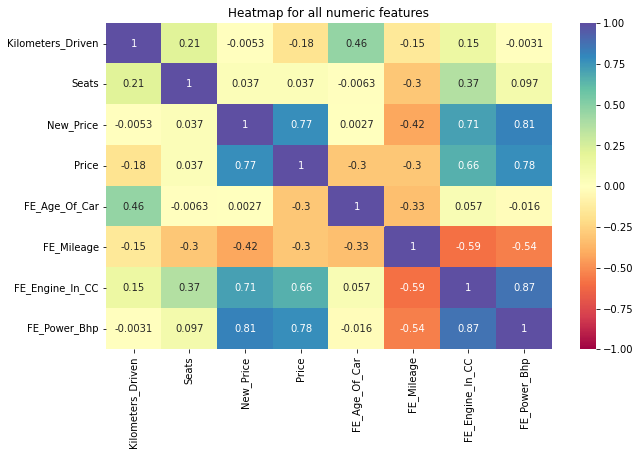

In [145]:
#Let's start with Heatmap to check relationships between all numeric features

plt.figure(figsize=(10,6))
plt.title('Heatmap for all numeric features')

sns.heatmap(df_train.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

1. Strong corelation (>= 0.7 absolute value) exists between below features - 

  a. New_Price and Price - As expected
  
  b. New_Price and FE_Engine_In_CC - Bigger / better engine, more the price

  c. New_Price and FE_Power_Bhp - Bigger / better engine, more the price

  d. Price and FE_Power_Bhp - Bigger / better engine, more the price (even for resale)

  e. FE_Engine_In_CC and FE_Power_Bhp - Obviusly tightly related. In fact this is causation. Bigger engine in almost all cases will have more power

  This needs to be checked further.

2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

  a. Kilometers_Driven and FE_Age_Of_Car - As expected

  b. Seats and FE_Engine_In_CC - More seats, bigger vehicle , hence need bigger engine

  c. New_Price and FE_Mileage (Negative) - Seems to be incidental corelation

  d. FE_Milege and FE_Engine_In_CC (Negative)- Incidental corelation

  e. Price and FE_Age_Of_Car (Negative) - As expected, Older cars(more age) will be cheaper(less price)

  f. Price and FE_Engine_In_CC - Bigger / better engine, more the price (even for resale)

  g. FE_Mileasge and FE_Power_Bhp (Negative) - Incidental corelation


In [146]:
# Check unique values and counts

df_train['Fuel_Type'].value_counts()

Diesel      2223
Petrol      1943
CNG           38
LPG            8
Electric       1
Name: Fuel_Type, dtype: int64

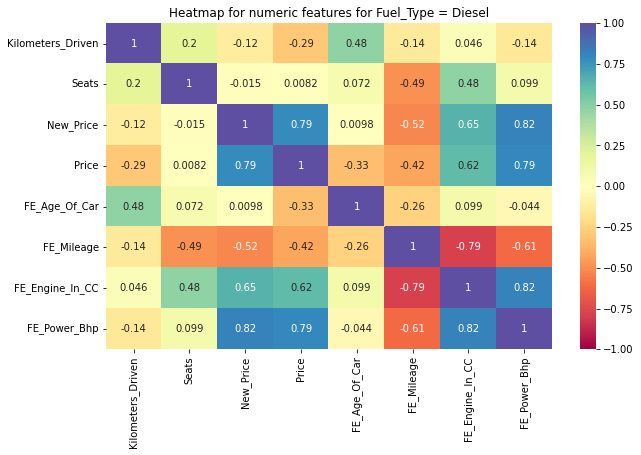

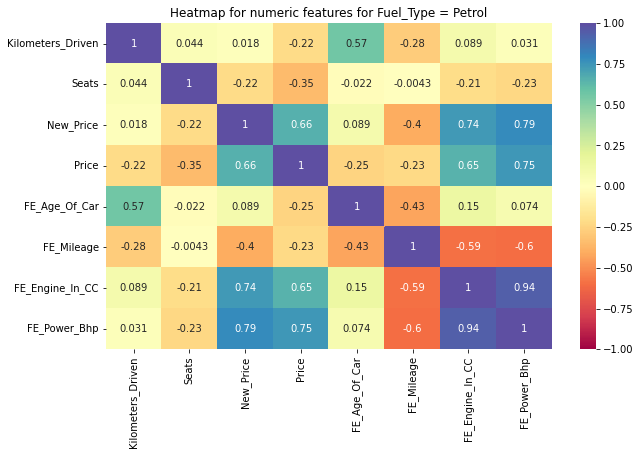

In [147]:
# Let's check Heatmap for relevant numeric features, but for groups segregated by Fuel_Type (top 2)

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for Fuel_Type = Diesel')
sns.heatmap(df_train[df_train['Fuel_Type'] == 'Diesel'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for Fuel_Type = Petrol')
sns.heatmap(df_train[df_train['Fuel_Type'] == 'Petrol'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

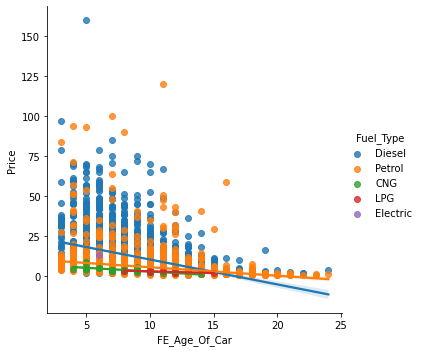

In [148]:
#Lmplot

sns.lmplot(data=df_train,x='FE_Age_Of_Car', y='Price', hue='Fuel_Type');

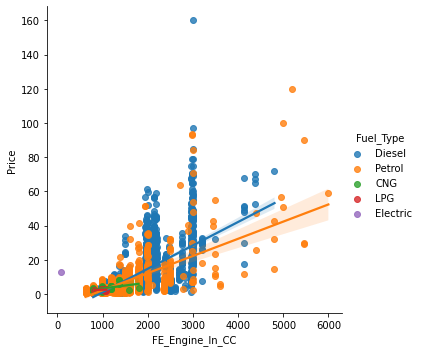

In [149]:
#Lmplot

sns.lmplot(data=df_train,x='FE_Engine_In_CC', y='Price', hue='Fuel_Type');

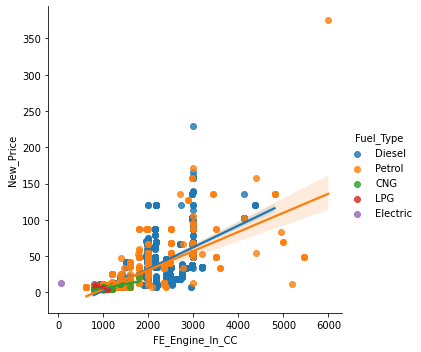

In [150]:
#Lmplot

sns.lmplot(data=df_train,x='FE_Engine_In_CC', y='New_Price', hue='Fuel_Type');

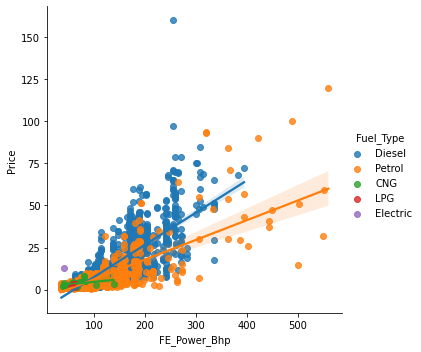

In [151]:
#Lmplot

sns.lmplot(data=df_train,x='FE_Power_Bhp', y='Price', hue='Fuel_Type');

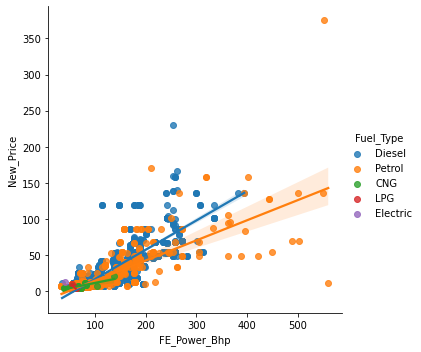

In [152]:
#Lmplot

sns.lmplot(data=df_train,x='FE_Power_Bhp', y='New_Price', hue='Fuel_Type');

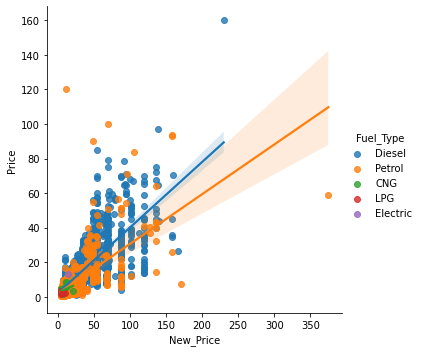

In [153]:
#Lmplot

sns.lmplot(data=df_train,x='New_Price', y='Price', hue='Fuel_Type');

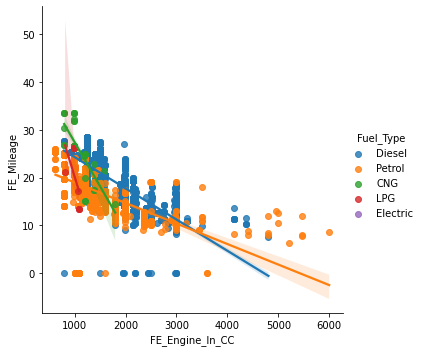

In [154]:
#Lmplot

sns.lmplot(data=df_train,x='FE_Engine_In_CC', y='FE_Mileage', hue='Fuel_Type');

1. As age goes up, Diesel and Petrol cars lose value. For first 15 years, Petrol cars depreciate faster. After 15 years Diesel cars depreciate faster. 
2. Price goes up more steeply with engine size and power, for Diesel cars
3. Mileage has stronger negative corelation with Engine size for Diesel cars
4. Mileage drops down steeply with engine size for CNG and LPG than for Diesel and Petrol
5. Based on Price and New_Price plot, Diesel cars seem to retain value better than Petrol

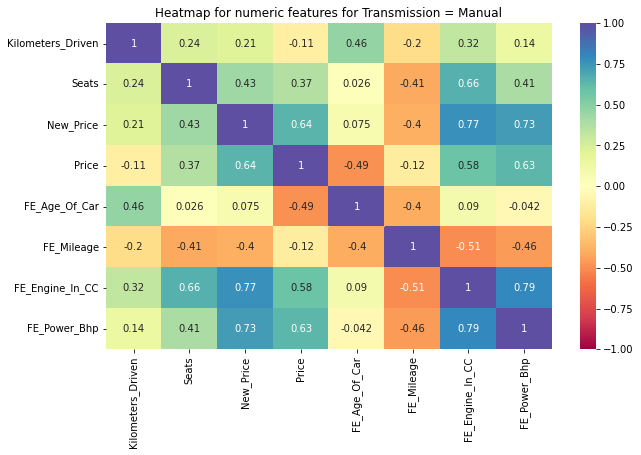

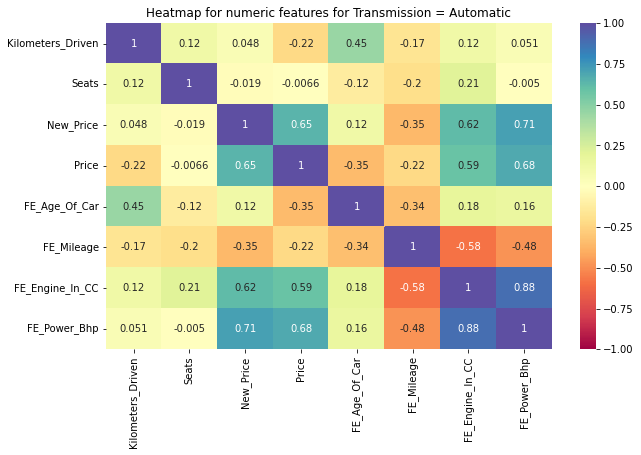

In [155]:
# Let's check Heatmap for relevant numeric features, but for groups segregated by Transmission

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for Transmission = Manual')
sns.heatmap(df_train[df_train['Transmission'] == 'Manual'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for Transmission = Automatic')
sns.heatmap(df_train[df_train['Transmission'] == 'Automatic'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

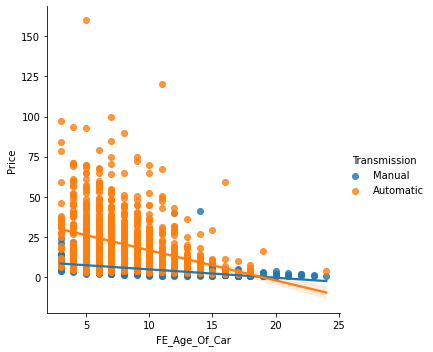

In [156]:
sns.lmplot(data=df_train,x='FE_Age_Of_Car', y='Price', hue='Transmission');

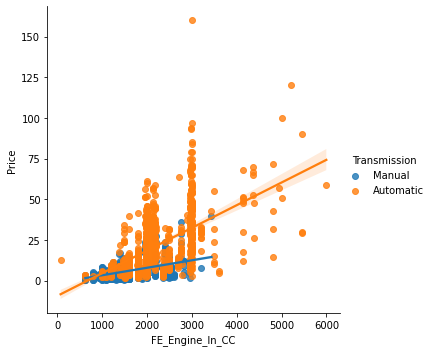

In [157]:
sns.lmplot(data=df_train,x='FE_Engine_In_CC', y='Price', hue='Transmission');

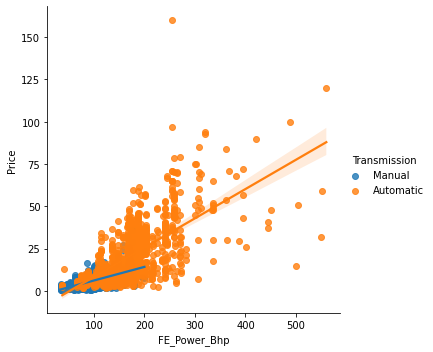

In [158]:
sns.lmplot(data=df_train,x='FE_Power_Bhp', y='Price', hue='Transmission');

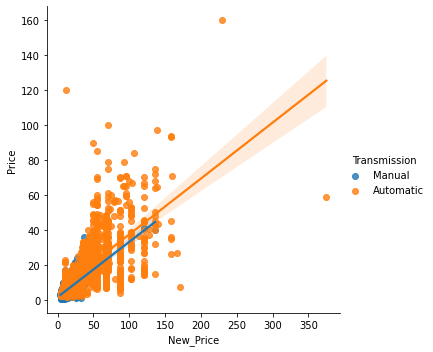

In [159]:
sns.lmplot(data=df_train,x='New_Price', y='Price', hue='Transmission');

1. Looks like upto 18 years, manual transmission cars are cheaper that ones with automatic transmission, although they lose value at a faster rate. After 18 years, automatic ones are cheaper than manual transmission ones. Probably because maintenance goes up for them
2. Not much difference for other parameters due to transmission value. In general, for the same engine size and power, manual transmission cars are cheaper

In [160]:
df_train['FE_Brand_Name'].value_counts()

Others           873
maruti           845
hyundai          775
honda            436
toyota           274
volkswagen       232
mercedes-benz    217
ford             208
bmw              195
audi             158
Name: FE_Brand_Name, dtype: int64

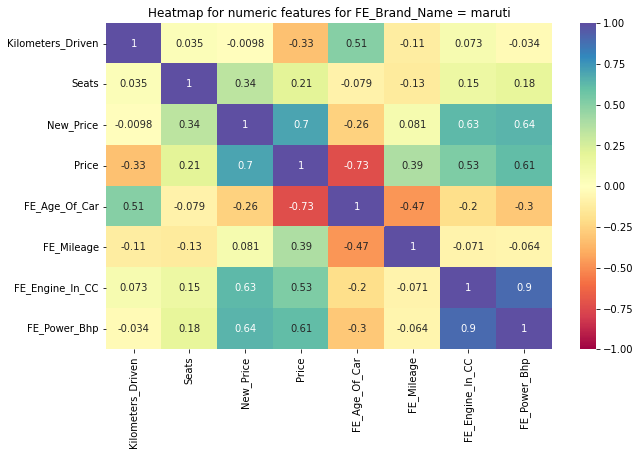

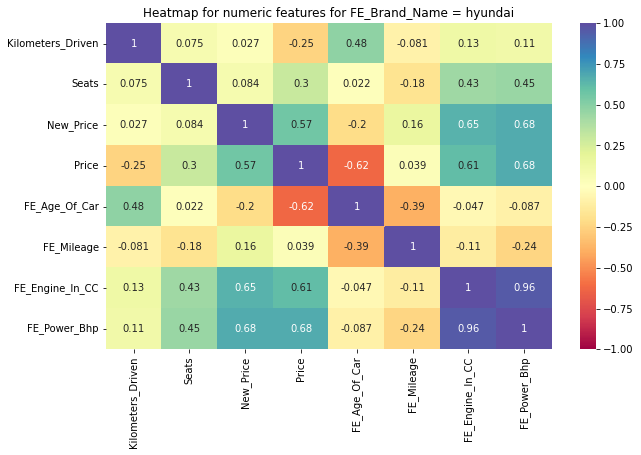

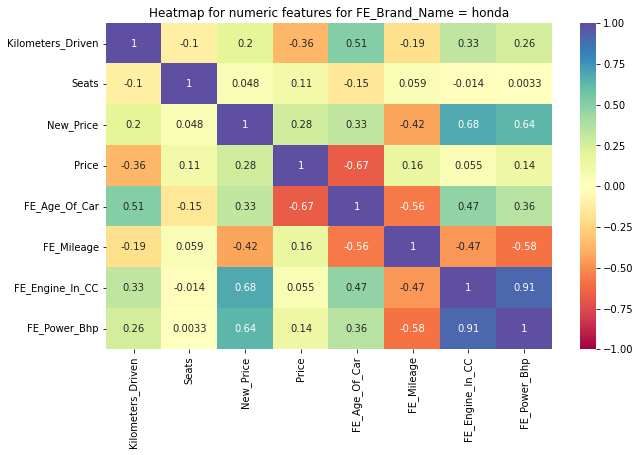

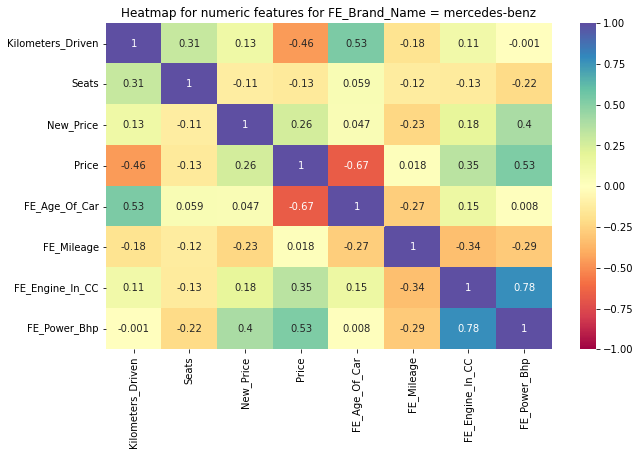

In [161]:
# Let's check Heatmap for relevant numeric features, but for groups segregated by FE_Brand_Name, chosen top 3 brands by counts and 1 luury brand

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for FE_Brand_Name = maruti')
sns.heatmap(df_train[df_train['FE_Brand_Name'] == 'maruti'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for FE_Brand_Name = hyundai')
sns.heatmap(df_train[df_train['FE_Brand_Name'] == 'hyundai'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for FE_Brand_Name = honda')
sns.heatmap(df_train[df_train['FE_Brand_Name'] == 'honda'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

plt.figure(figsize=(10,6))
plt.title('Heatmap for numeric features for FE_Brand_Name = mercedes-benz')
sns.heatmap(df_train[df_train['FE_Brand_Name'] == 'mercedes-benz'].corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

1. Luxury brand's price seem to be less strongly corelated with Engine and Power. With standard brands, more price for more engine size and power. With luxury brand, thats not necessarily true.
2. Price depreciates more with Km driven for Mercedes


Let's check how Price differs based on several features

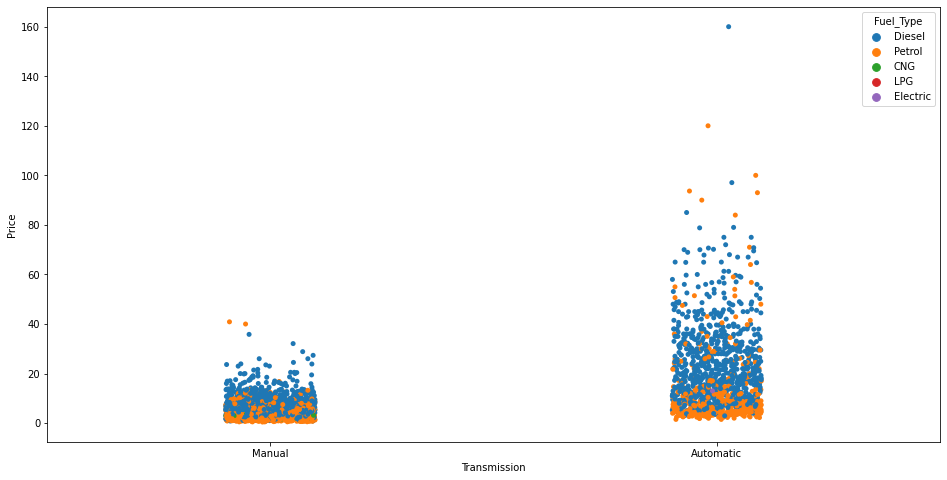

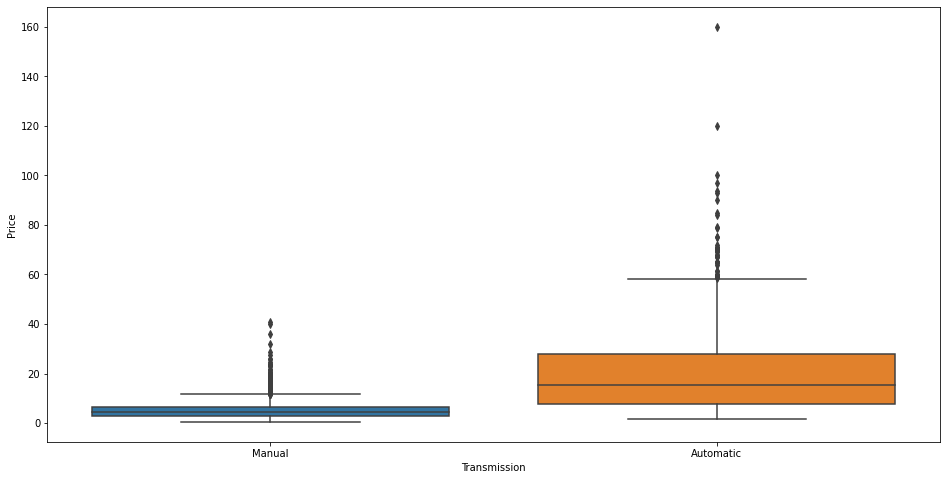

In [162]:
# Create stripplot for Price and Transmission.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df_train, x='Transmission', y='Price', hue = 'Fuel_Type');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_train, x='Transmission', y='Price')
plt.show()

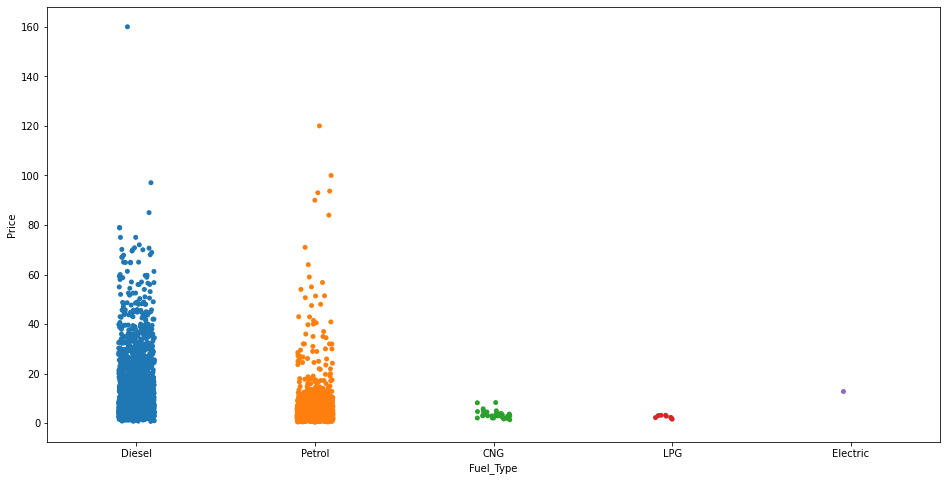

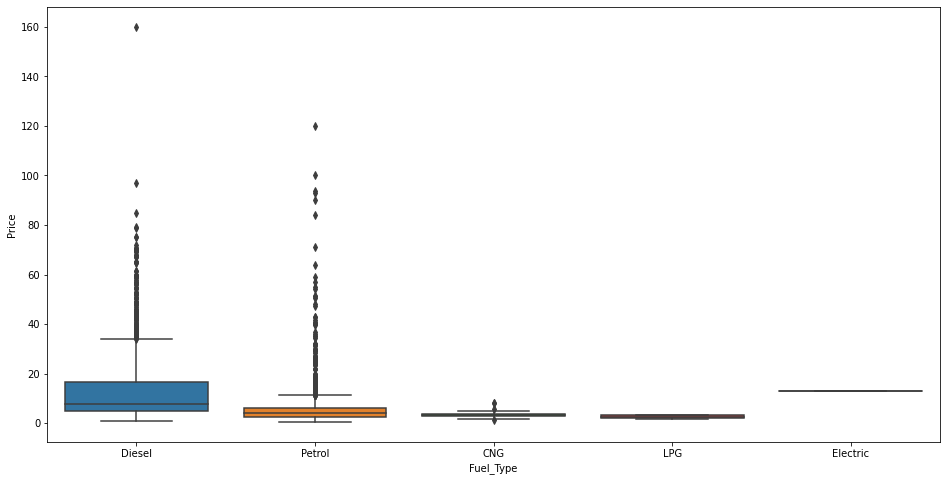

In [163]:
# Create stripplot for Price and Fuel_Type  

plt.figure(figsize=(16,8))
sns.stripplot(data=df_train, x='Fuel_Type', y='Price');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_train, x='Fuel_Type', y='Price')
plt.show()

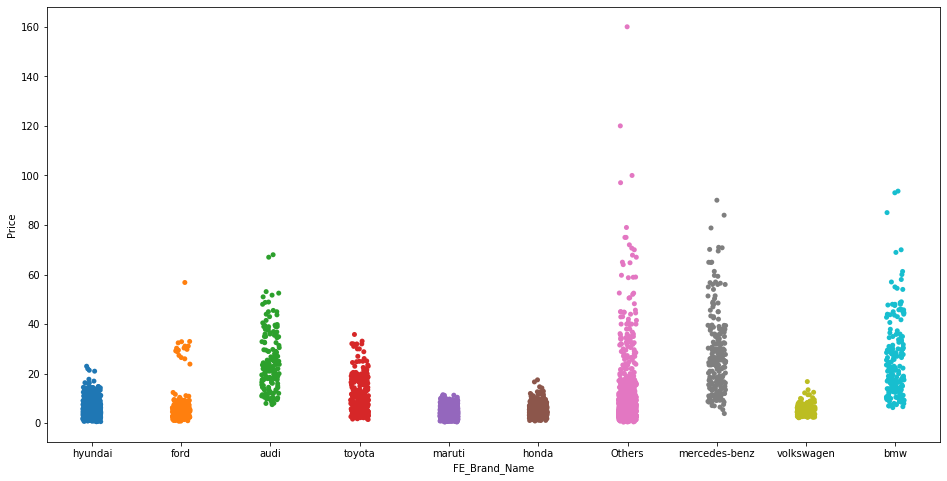

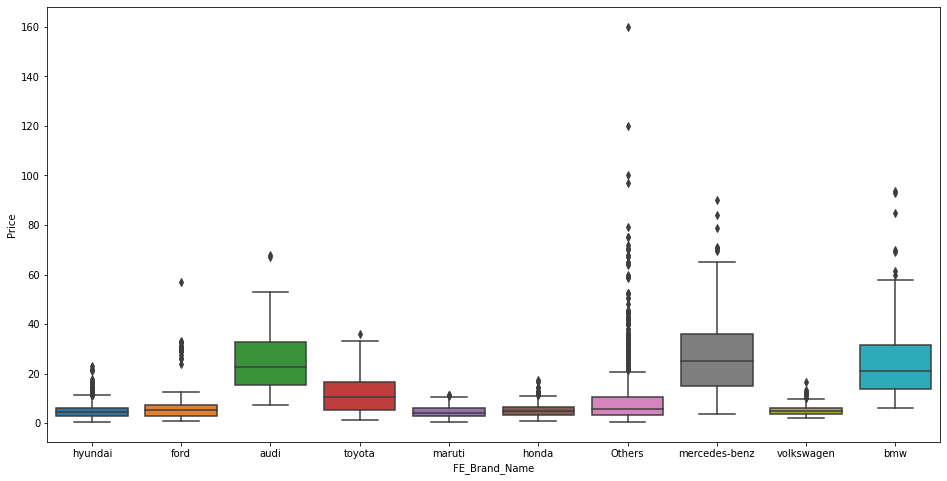

In [164]:
# Create stripplot for Price and FE_Brand_Name.  

plt.figure(figsize=(16,8))
sns.stripplot(data=df_train, x='FE_Brand_Name', y='Price');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_train, x='FE_Brand_Name', y='Price')
plt.show()

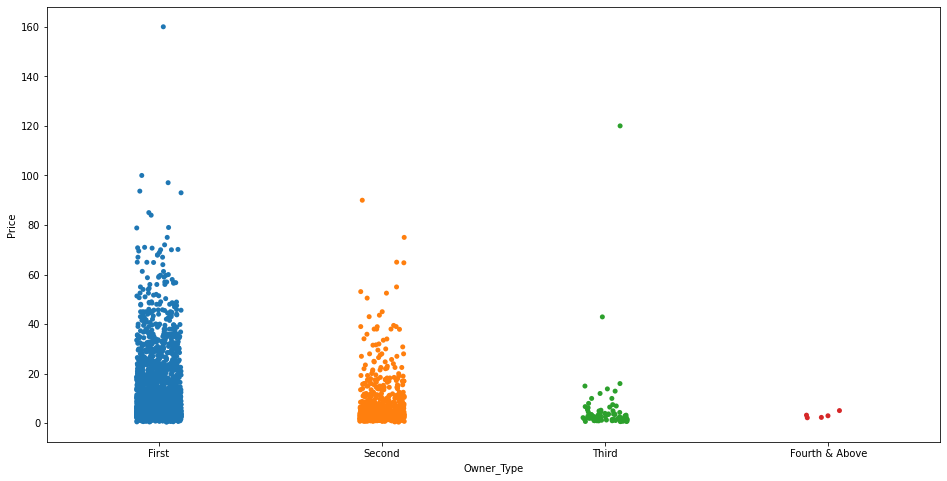

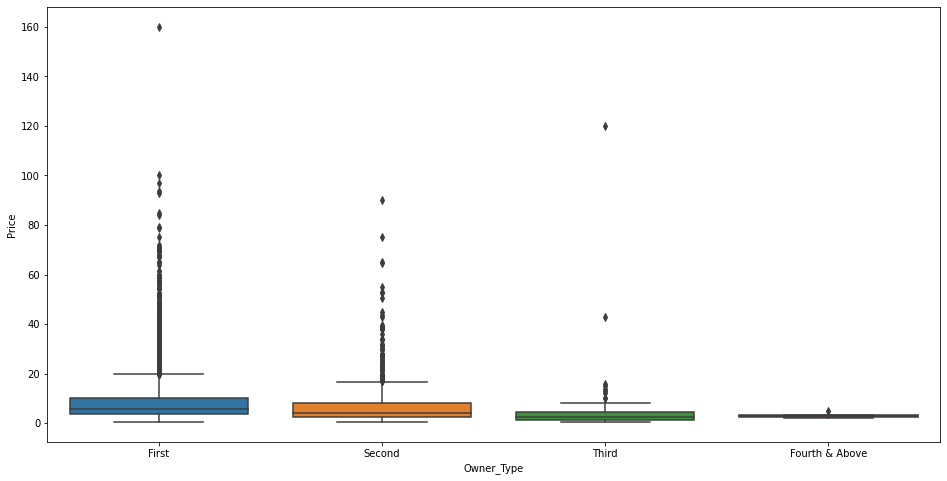

In [165]:
# Create stripplot for Price and Owner_Type   

plt.figure(figsize=(16,8))
sns.stripplot(data=df_train, x='Owner_Type', y='Price');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_train, x='Owner_Type', y='Price')
plt.show()

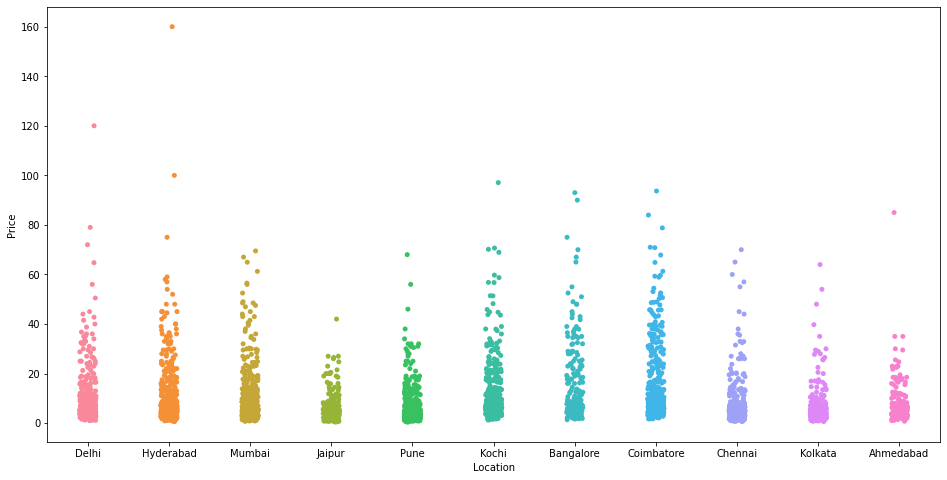

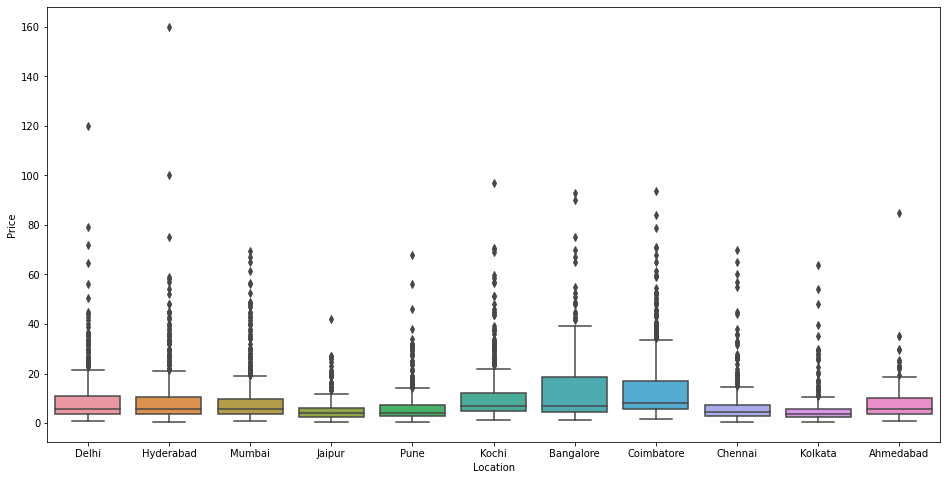

In [166]:
# Create stripplot for Price and Location   

plt.figure(figsize=(16,8))
sns.stripplot(data=df_train, x='Location', y='Price');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_train, x='Location', y='Price')
plt.show()

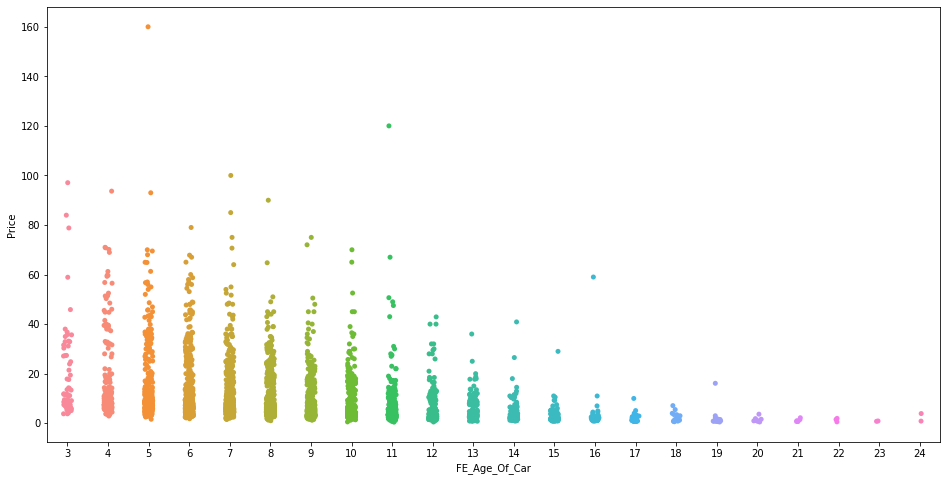

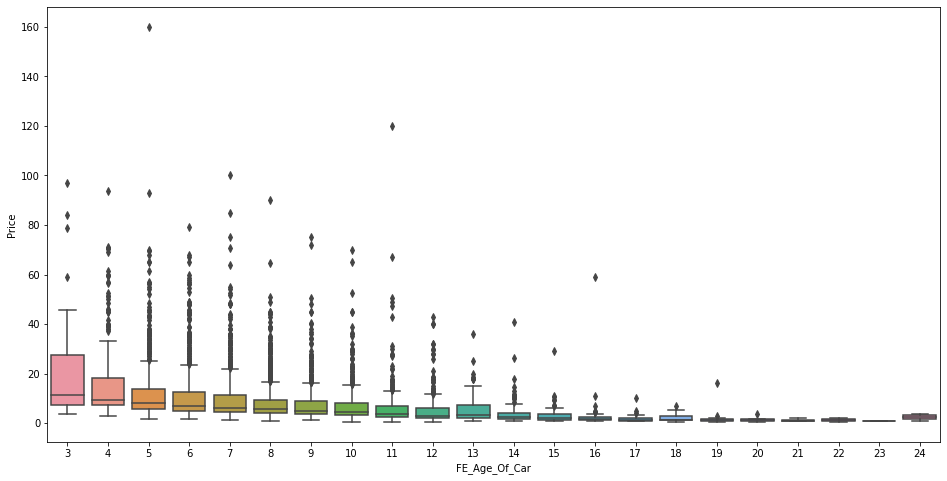

In [167]:
# Create stripplot for Price and FE_Age_Of_Car   

plt.figure(figsize=(16,8))
sns.stripplot(data=df_train, x='FE_Age_Of_Car', y='Price');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_train, x='FE_Age_Of_Car', y='Price')
plt.show()

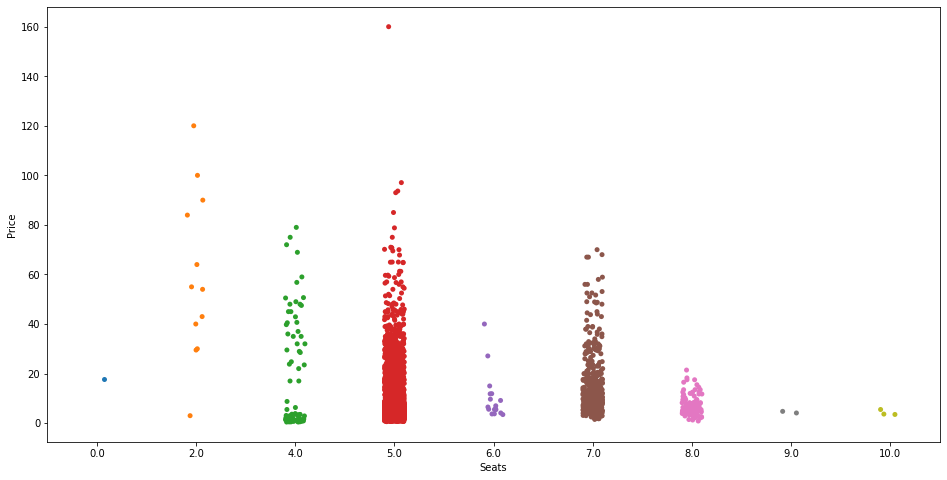

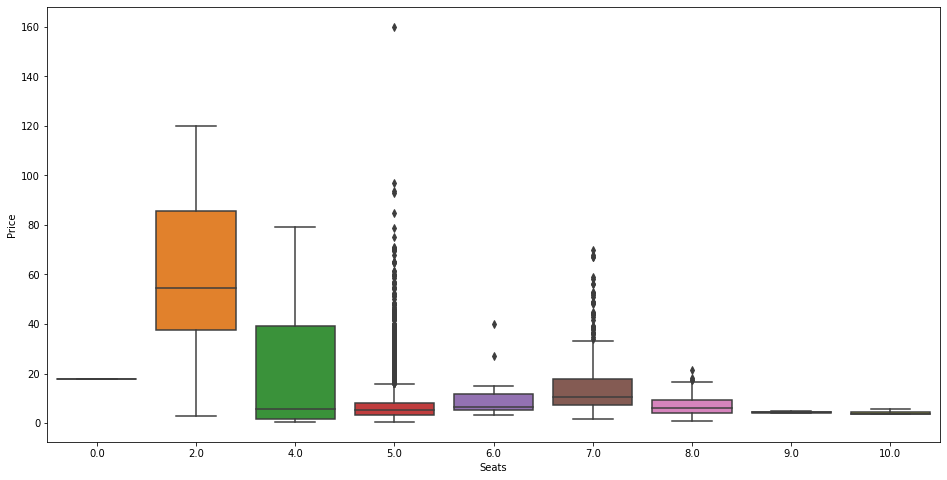

In [168]:
# Create stripplot for Price and Seats   

plt.figure(figsize=(16,8))
sns.stripplot(data=df_train, x='Seats', y='Price');
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df_train, x='Seats', y='Price')
plt.show()

## 10c. EDA - Insights Summary

### Dataset

1. Not a sizable dataset with only few thousand records
2. There are missing values for few features ike Poer, engine, Seats and Mileage
3. Most important feature - Price - also had significant missing values. 1234 out of 7253 records were missing Price. In real world, this should be checked with business / SME
4. No dupicate records
5. There were obvious outliers for several features. Some were realistic, but some definitely indicated data quality issue


### Univariate Analysis

1. Mumbai has the highest records in the dataset, followed by Hyderabad and then Pune
2. In most cities, diesel cars have more records, except in Mumbai, Pune, Kochi and Kolkata
3. Most of the cars that are sold are pre-owned by 1 owner only
4. Majority of the cars are either Petrol or Diesel. Negligible CNG / LPG or Electric cars
5. Automatic transmission cars are Petrol or Diesel only
6. More manual transmission cars are sold than automatic
7. Most of the cars have 5 Seats, followed by 7 Seaters.
8. Most of the 7 Seater cars are Diesel
9. Top 5 brands by volume of cars sold are -  Maruti, Hyundai, Honda, Toyota & volkswagen
10. Top 5 brands by revenue are - mercedes-benz, bmw, hyundia, audi & maruti
11. Quality issues uncovered -

  a. Missing values

  b. Outliers

  c. Incorrect values. For example, Mileage = 0.00


### Multivariate Analysis

1. 1. Strong corelation (>= 0.7 absolute value) exists between below features - 

  a. New_Price and Price - As expected
  
  b. New_Price and FE_Engine_In_CC - Bigger / better engine, more the price

  c. New_Price and FE_Power_Bhp - Bigger / better engine, more the price

  d. Price and FE_Power_Bhp - Bigger / better engine, more the price (even for resale)

  e. FE_Engine_In_CC and FE_Power_Bhp - Obviusly tightly related. In fact this is causation. Bigger engine in almost all cases will have more power

2. Moderately corelation (between 0.3 and 0.7 absolute value) exist between below features - 

  a. Kilometers_Driven and FE_Age_Of_Car - As expected

  b. Seats and FE_Engine_In_CC - More seats, bigger vehicle , hence need bigger engine

  c. New_Price and FE_Mileage (Negative) - Seems to be incidental corelation

  d. FE_Milege and FE_Engine_In_CC (Negative)- Incidental corelation

  e. Price and FE_Age_Of_Car (Negative) - As expected, Older cars(more age) will be cheaper(less price)

  f. Price and FE_Engine_In_CC - Bigger / better engine, more the price (even for resale)

  g. FE_Mileasge and FE_Power_Bhp (Negative) - Incidental corelation

3. As age of the car goes up, Diesel and Petrol cars lose value. For first 15 years, Petrol cars depreciate faster. After 15 years Diesel cars depreciate faster. 

4. Price goes up more steeply with engine size and power, for Diesel cars

5. Mileage has stronger negative corelation with Engine size for Diesel cars

6. Mileage drops down steeply with engine size for CNG and LPG than for Diesel and Petrol

7. Based on Price and New_Price plot, Diesel cars seem to retain value better than Petrol

8. Looks like upto 18 years, manual transmission cars are cheaper than ones with automatic transmission, although they lose value at a faster rate. After 18 years, automatic ones are cheaper than manual transmission ones. Probably because maintenance goes up for them

9. Not much difference for other parameters due to transmission value. In general, for the same engine size and power, manual transmission cars are cheaper

10. Luxury brand's (mercedes, bmw) price seem to be less strongly corelated with Engine and Power. With standard brands (maruti, hyundia), more price for more engine size and power. With luxury brands, thats not necessarily true.

11. Price depreciates more with Km driven for luxury brands like mercedes

12. From Price perspective, below cars are more profitable - 

  a. Automatic transmission

  b. Diesel & Electric fuels
  
  c. Luxury brands like mercedes, bmw and audi
  
  d. 2 seaters 
  
  e. Locations of Kochi, Bangalore, Coimbtore
  
  f. Around 3 years age of the car

  g. Cars pre-owned by 1 owner

  h. Cars with higher new price

  i. Cars with bigger engine size and more power





## 10d. Feature Treatment - Missing values / Outliers

Purpose is to treat missing values and handle outliers in TRAIN dataset

### 10d.1 FE_Age_Of_Car 

In [169]:
# Calculate upper whisker 

Temp_v = 'FE_Age_Of_Car'
Temp_upper_whisker_FE_Age_Of_Car = Temp_q3_FE_Age_Of_Car + (1.5 * Temp_iqr_FE_Age_Of_Car)

In [170]:
# Check outliers 

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_FE_Age_Of_Car, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Age_Of_Car].value_counts().sum()

Upper Whisker for FE_Age_Of_Car is:  18.5 

Records above Upper Whisker are 



29

In [171]:
# Outlier treatment - Replace with median

#df_train.loc[df_train.FE_Age_Of_Car > Temp_upper_whisker_FE_Age_Of_Car, Temp_v] = np.nan
#df_train[Temp_v].fillna(Temp_q2_FE_Age_Of_Car, inplace=True)  # Median

In [172]:
# Confirm that records are updated

df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Age_Of_Car].value_counts().sum()

29

In [173]:
# Check missing values

df_train[Temp_v].isnull().sum()

0

In [174]:
del Temp_v

### 10d.2 Seats

In [175]:
# Fill missing values with median

Temp_Train_Median_Seats = int(df_train['Seats'].median())

df_train['Seats'].fillna(Temp_Train_Median_Seats, inplace=True) 

In [176]:
# Change the datatype of Seats to integer

df_train['Seats'] = df_train['Seats'].astype(int)

In [177]:
# Checking for missing value counts

df_train['Seats'].isnull().sum()

0

In [178]:
# Replace record with 0 seats with median 

df_train['Seats'] = df_train['Seats'].replace(0, Temp_Train_Median_Seats)
df_train[df_train['Seats']==0]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp


### 10d.3 FE_Mileage

In [179]:
# Check outliers 

Temp_v = 'FE_Mileage'

Temp_upper_whisker_FE_Mileage = Temp_q3_FE_Mileage + (1.5 * Temp_iqr_FE_Mileage)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_FE_Mileage, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Mileage]

Upper Whisker for FE_Mileage is:  30.100000000000005 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
5710,Maruti Alto 800 CNG LXI,Mumbai,26200,CNG,Manual,First,5,4.36,2.15,9,maruti,30.46,796.00,47.30
5935,Maruti Alto K10 LXI CNG,Pune,59525,CNG,Manual,Second,4,4.36,3.10,7,maruti,32.26,998.00,58.20
3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,65537,CNG,Manual,Second,4,4.36,2.10,10,maruti,33.44,796.00,40.30
2701,Maruti Celerio CNG VXI MT,Kochi,70536,CNG,Manual,First,5,5.87,4.58,6,maruti,31.79,998.00,58.33
3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,18000,CNG,Manual,First,4,4.36,3.00,7,maruti,33.44,796.00,40.30
5178,Maruti Celerio CNG VXI MT,Delhi,64687,CNG,Manual,First,5,5.87,3.80,7,maruti,31.79,998.00,58.33
2371,Maruti Wagon R CNG LXI,Pune,29202,CNG,Manual,First,5,5.54,3.90,8,maruti,33.54,998.00,67.04
3129,Maruti Wagon R CNG LXI,Delhi,74663,CNG,Manual,First,5,5.35,3.25,8,maruti,33.54,998.00,67.04
1332,Maruti Wagon R CNG LXI,Pune,79494,CNG,Manual,First,5,5.54,2.96,9,maruti,33.54,998.00,67.04
4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,24310,CNG,Manual,First,4,4.36,3.70,5,maruti,33.44,796.00,40.30


In [180]:
# check missing values 

df_train[df_train['FE_Mileage'].isnull()]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
4446,Mahindra E Verito D4,Chennai,50000,Electric,Automatic,First,5,13.58,13.00,6,Others,NaN,72.00,41.00


In [ ]:
# Fill missing values with median

df_train['FE_Mileage'].fillna(Temp_q2_FE_Mileage, inplace=True)  # Median

#If we had to use Brand and Model and get median of that group
#df[col] = df.groupby(["Brand", "Model"])[col].transform(lambda x: x.fillna(x.median())

df_train['FE_Mileage'].isnull().sum()

0

In [ ]:
#Mileage values being 0.00 seems to be incorrect. In real world, we could have enhanced the dataset to get these values. For this exercise, filling the values with Median for the Feature

df_train['FE_Mileage'] = df_train['FE_Mileage'].replace(0.00, Temp_q2_FE_Mileage)  # Median

In [ ]:
# Treat outliers 
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method 

#df_train.loc[df_train.FE_Mileage > Temp_upper_whisker_FE_Mileage, 'FE_Mileage'] = np.nan
#df_train['FE_Mileage'].fillna(Temp_q2_FE_Mileage, inplace=True)  # Median

In [ ]:
# Check lower outliers 

Temp_lower_whisker_FE_Mileage = Temp_q1_FE_Mileage - (1.5 * Temp_iqr_FE_Mileage)

print('Lower Whisker for', Temp_v , 'is: ', Temp_lower_whisker_FE_Mileage, '\n')
print('Records below Lower Whisker are \n')
df_train[df_train[Temp_v] < Temp_lower_whisker_FE_Mileage]

Lower Whisker for FE_Mileage is:  6.099999999999996 

Records below Lower Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp


In [ ]:
# Treat lower outliers 
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method 

#df_train.loc[df_train.FE_Mileage < Temp_lower_whisker_FE_Mileage, 'FE_Mileage'] = np.nan
#df_train['FE_Mileage'].fillna(Temp_q2_FE_Mileage, inplace=True)  # Median


In [ ]:
df_train['FE_Mileage'].isnull().sum()

0

In [ ]:
del Temp_v

### 10d.4 FE_Engine_In_CC

In [ ]:
# Check outliers 

Temp_v = 'FE_Engine_In_CC'

Temp_upper_whisker_FE_Engine_In_CC= Temp_q3_FE_Engine_In_CC + (1.5 * Temp_iqr_FE_Engine_In_CC)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_FE_Engine_In_CC, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Engine_In_CC]

Upper Whisker for FE_Engine_In_CC is:  3163.0 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
6011,Skoda Superb 3.6 V6 FSI,Hyderabad,53000,Petrol,Automatic,First,5,33.36,4.75,13,Others,18.20,3597.00,262.60
798,Mercedes-Benz SLK-Class SLK 350,Bangalore,10000,Petrol,Automatic,First,2,49.49,55.00,7,mercedes-benz,18.10,3498.00,306.00
2669,Ford Endeavour 3.2 Trend AT 4X4,Coimbatore,51530,Diesel,Automatic,First,7,35.29,30.27,4,ford,10.91,3198.00,197.20
4388,Audi Q7 4.2 TDI Quattro Technology,Bangalore,50000,Diesel,Automatic,First,7,101.96,48.00,7,audi,11.33,4134.00,335.20
4821,BMW 6 Series 630i Coupe,Mumbai,5900,Petrol,Automatic,First,4,55.07,47.50,11,bmw,7.94,4395.00,450.00
5521,Bentley Continental Flying Spur,Hyderabad,48000,Petrol,Automatic,First,4,375.00,59.00,16,Others,8.60,5998.00,552.00
5414,Mercedes-Benz R-Class R350 4Matic Long,Kochi,45710,Petrol,Automatic,First,7,49.49,23.68,8,mercedes-benz,11.80,3498.00,272.00
3079,Ford Endeavour 3.2 Titanium AT 4X4,Mumbai,29000,Diesel,Automatic,First,7,35.29,29.80,6,ford,10.91,3198.00,197.00
4906,Ford Endeavour 3.2 Titanium AT 4X4,Hyderabad,15000,Diesel,Automatic,First,7,35.29,33.00,4,ford,10.91,3198.00,197.00
2681,Skoda Superb 3.6 V6 FSI,Hyderabad,54000,Petrol,Automatic,First,5,33.36,6.00,12,Others,18.20,3597.00,262.60


In [ ]:
# Check missing values

df_train['FE_Engine_In_CC'].isnull().sum()

28

In [ ]:
# Fill missing values

df_train['FE_Engine_In_CC'].fillna(Temp_q2_FE_Engine_In_CC, inplace=True)  # Median
df_train['FE_Engine_In_CC'].isnull().sum()


0

In [ ]:
# Treat outliers
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method 

#df_train.loc[df_train.FE_Engine_In_CC > Temp_upper_whisker_FE_Engine_In_CC, 'FE_Engine_In_CC'] = np.nan
#df_train['FE_Engine_In_CC'].fillna(Temp_q2_FE_Engine_In_CC, inplace=True)  # Median

### 10d.5 FE_Power_Bhp

In [ ]:
# Check outliers 

Temp_upper_whisker_FE_Power_Bhp = Temp_q3_FE_Power_Bhp + (1.5 * Temp_iqr_FE_Power_Bhp)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_FE_Power_Bhp, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_FE_Power_Bhp]

Upper Whisker for FE_Engine_In_CC is:  231.6925 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
4054,Hyundai i20 Sportz 1.4 CRDi,Delhi,25500,Diesel,Manual,First,5,10.25,7.00,5,hyundai,22.54,1396.00,88.73
538,Ford Fiesta Classic 1.4 Duratorq CLXI,Hyderabad,107000,Diesel,Manual,First,5,11.69,3.00,10,ford,17.80,1399.00,67.00
148,Audi RS5 Coupe,Mumbai,23000,Petrol,Automatic,First,4,128.00,37.00,9,audi,11.05,2894.00,444.00
5859,Toyota Fortuner 4x2 Manual,Jaipur,73053,Diesel,Manual,First,7,37.17,20.00,6,toyota,13.00,2982.00,168.50
4051,Toyota Etios G,Delhi,70000,Petrol,Manual,First,5,8.53,3.25,8,toyota,16.78,1496.00,88.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,Honda City i DTEC S,Ahmedabad,66000,Diesel,Manual,First,5,13.58,5.70,8,honda,26.00,1498.00,98.60
3441,Volkswagen CrossPolo 1.5 TDI,Kolkata,26256,Diesel,Manual,First,5,10.15,4.25,7,volkswagen,20.14,1498.00,88.50
1344,Toyota Corolla Altis 2008-2013 1.8 VL AT,Mumbai,78000,Petrol,Automatic,Second,5,21.09,3.41,14,toyota,14.53,1794.00,138.10
4623,Maruti Swift Ldi BSIV,Pune,140000,Diesel,Manual,Second,5,7.88,2.49,13,maruti,17.80,1248.00,75.00


In [ ]:
# check missing values

df_train['FE_Power_Bhp'].isnull().sum()


105

In [ ]:
# Fill missing values

df_train['FE_Power_Bhp'].fillna(Temp_q2_FE_Power_Bhp, inplace=True)  # Median
df_train['FE_Power_Bhp'].isnull().sum()

0

In [ ]:
# Treat outliers

# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method 


#df_train.loc[df_train.FE_Power_Bhp > Temp_upper_whisker_FE_Power_Bhp, 'FE_Power_Bhp'] = np.nan
#df_train['FE_Power_Bhp'].fillna(Temp_q2_FE_Power_Bhp, inplace=True)  # Median


### 10d.6 Kilometers_Driven

In [ ]:
# Check outliers
# Used 4*IQR as some of the cars may have been genuinely driven more

Temp_v = 'Kilometers_Driven'

Temp_upper_whisker_Kilometers_Driven = Temp_q3_Kilometers_Driven + (4 * Temp_iqr_Kilometers_Driven)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Kilometers_Driven, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_Kilometers_Driven]


Upper Whisker for Kilometers_Driven is:  230570.0 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
5834,Toyota Innova 2.5 G (Diesel) 8 Seater,Jaipur,250000,Diesel,Manual,Second,8,24.01,7.90,9,toyota,12.99,2494.00,100.60
3649,Tata Indigo LS,Jaipur,300000,Diesel,Manual,First,5,7.63,1.00,14,Others,17.00,1405.00,70.00
2346,Mahindra Xylo D2 BSIV,Chennai,234000,Diesel,Manual,Second,8,11.67,3.50,9,Others,14.00,2489.00,95.00
3894,Toyota Innova 2.5 GX 7 STR,Hyderabad,250000,Diesel,Manual,Second,7,24.01,6.50,12,toyota,12.80,2494.00,102.00
2988,Toyota Innova 2.5 G4 Diesel 8-seater,Chennai,240000,Diesel,Manual,Fourth & Above,8,24.01,5.10,17,toyota,12.80,2494.00,102.00
1101,Toyota Innova 2.5 V Diesel 7-seater,Chennai,248000,Diesel,Manual,Second,7,24.01,9.20,11,toyota,12.80,2494.00,102.00
4792,Toyota Fortuner 3.0 Diesel,Chennai,242000,Diesel,Manual,First,7,37.17,11.00,12,toyota,11.50,2982.00,171.00
1975,Skoda Superb 1.8 TSI MT,Pune,282000,Petrol,Manual,First,5,33.36,3.30,10,Others,13.14,1798.00,160.00
3092,Honda City i VTEC SV,Kolkata,480000,Petrol,Manual,First,5,13.58,5.00,7,honda,17.40,1497.00,117.30
4719,Toyota Innova 2.5 GX (Diesel) 8 Seater,Chennai,250000,Diesel,Manual,First,8,24.01,10.90,8,toyota,12.99,2494.00,100.60


In [ ]:
# Check missing values

df_train['Kilometers_Driven'].isnull().sum()


0

In [ ]:
# Treat outliers

df_train.loc[df_train.Kilometers_Driven > Temp_upper_whisker_Kilometers_Driven, 'Kilometers_Driven'] = np.nan
df_train['Kilometers_Driven'].fillna(Temp_q2_Kilometers_Driven, inplace=True)  # Median

### 10d.7 New_Price

In [ ]:
# Check outliers 

Temp_v = 'New_Price'

Temp_upper_whisker_New_Price = Temp_q3_New_Price + (4 * Temp_iqr_New_Price)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_New_Price, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train[Temp_v] > Temp_upper_whisker_New_Price]

Upper Whisker for New_Price is:  77.33 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
148,Audi RS5 Coupe,Mumbai,23000.00,Petrol,Automatic,First,4,128.00,37.00,9,audi,11.05,2894.00,444.00
4800,Mercedes-Benz E-Class 2009-2013 E250 CDI Blue ...,Bangalore,48000.00,Diesel,Automatic,First,5,86.97,22.00,9,mercedes-benz,14.21,2143.00,203.00
5512,Porsche Cayenne 2009-2014 Diesel,Kochi,47877.00,Diesel,Automatic,First,5,136.00,48.22,7,Others,15.15,2967.00,240.00
786,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Delhi,70000.00,Diesel,Automatic,First,5,86.97,15.80,9,mercedes-benz,10.00,2148.00,170.00
489,Mercedes-Benz GLS 350d 4MATIC,Pune,129000.00,Diesel,Automatic,First,7,100.00,56.00,5,mercedes-benz,11.00,2987.00,258.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,BMW 7 Series 740Li,Bangalore,17465.00,Petrol,Automatic,First,5,158.00,93.00,5,bmw,12.05,2979.00,320.00
5477,Land Rover Range Rover HSE Dynamic,Kochi,52827.00,Diesel,Automatic,First,5,120.00,44.76,4,Others,12.70,2179.00,187.70
3488,Audi Q7 3.0 TDI quattro,Coimbatore,91743.00,Diesel,Automatic,First,7,101.96,28.55,10,audi,12.07,2967.00,241.40
2808,Mercedes-Benz GLE 350d,Mumbai,19863.00,Diesel,Automatic,First,5,91.23,64.95,5,mercedes-benz,11.57,2987.00,254.79


In [ ]:
# Check missing values

df_train['New_Price'].isnull().sum()

0

In [ ]:
# Treat outliers
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method

#df_train.loc[df_train.New_Price > Temp_upper_whisker_New_Price, 'New_Price'] = np.nan
#df_train['New_Price'].fillna(Temp_q2_New_Price, inplace=True)  # Median


### 10d.8 Price

In [ ]:
# Check outliers

Temp_v = 'Price'
Temp_upper_whisker_Price = Temp_q3_Price + (1.5 * Temp_iqr_Price)

print('Upper Whisker for', Temp_v , 'is: ', Temp_upper_whisker_Price, '\n')
print('Records above Upper Whisker are \n')
df_train[df_train['Price'] > Temp_upper_whisker_Price]


Upper Whisker for Price is:  19.125 

Records above Upper Whisker are 



,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
148,Audi RS5 Coupe,Mumbai,23000.00,Petrol,Automatic,First,4,128.00,37.00,9,audi,11.05,2894.00,444.00
5859,Toyota Fortuner 4x2 Manual,Jaipur,73053.00,Diesel,Manual,First,7,37.17,20.00,6,toyota,13.00,2982.00,168.50
5122,Toyota Fortuner 4x2 Manual,Chennai,99000.00,Diesel,Manual,First,7,37.17,20.50,7,toyota,13.00,2982.00,168.50
4800,Mercedes-Benz E-Class 2009-2013 E250 CDI Blue ...,Bangalore,48000.00,Diesel,Automatic,First,5,86.97,22.00,9,mercedes-benz,14.21,2143.00,203.00
4513,Jaguar XF 2.2 Litre Executive,Bangalore,19000.00,Diesel,Automatic,Second,5,69.67,38.00,7,Others,16.36,2179.00,187.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,Mercedes-Benz GLE 350d,Mumbai,19863.00,Diesel,Automatic,First,5,91.23,64.95,5,mercedes-benz,11.57,2987.00,254.79
1828,BMW X1 xDrive 20d xLine,Mumbai,7000.00,Diesel,Automatic,First,5,48.18,27.75,6,bmw,20.68,1995.00,190.00
653,Toyota Fortuner 4x2 4 Speed AT,Jaipur,94000.00,Diesel,Automatic,First,7,37.17,20.50,7,toyota,11.50,2982.00,169.00
409,Audi Q3 35 TDI Quattro Premium,Kochi,37542.00,Diesel,Automatic,First,5,44.80,25.71,5,audi,15.73,1968.00,174.33


In [ ]:
# Check missing values

df_train['Price'].isnull().sum()

0

In [ ]:
# Treat outliers
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method


#df_train.loc[df_train.Price > Temp_upper_whisker_Price, 'Price'] = np.nan
#df_train['Price'].fillna(Temp_q2_Price, inplace=True)  # Median

## 10e. Feature Engineering


In [ ]:
df_train.sample(10,random_state=1)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp
5753,Nissan Terrano XL Plus 85 PS,Jaipur,60000.00,Diesel,Manual,First,5,16.65,6.00,8,Others,20.45,1461.00,83.80
661,Hyundai Grand i10 CRDi Sportz,Jaipur,64000.00,Diesel,Manual,First,5,7.45,4.15,8,hyundai,24.00,1120.00,70.00
5577,Volkswagen Polo Diesel Trendline 1.2L,Kolkata,55339.00,Diesel,Manual,First,5,10.15,2.65,10,volkswagen,22.07,1199.00,73.90
2612,BMW 3 Series 320d Prestige,Chennai,70000.00,Diesel,Automatic,First,5,54.43,17.55,8,bmw,18.88,1995.00,184.00
2549,Maruti Swift Dzire VXI,Pune,68218.00,Petrol,Manual,First,5,7.88,4.90,8,maruti,19.10,1197.00,85.80
3030,BMW 3 Series 320d Sport,Mumbai,37000.00,Diesel,Automatic,Third,5,54.43,15.00,10,bmw,22.69,1995.00,190.00
1304,Hyundai i20 Magna Optional 1.2,Delhi,63777.00,Petrol,Manual,First,5,10.25,3.67,9,hyundai,18.50,1197.00,82.90
4223,BMW X6 xDrive30d,Coimbatore,39626.00,Diesel,Automatic,First,4,55.07,40.66,8,bmw,11.20,2993.00,241.00
3187,Volkswagen Vento Diesel Highline,Chennai,150000.00,Diesel,Manual,First,5,13.23,5.00,9,volkswagen,20.54,1598.00,103.60
2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,62000.00,Diesel,Manual,First,7,24.01,7.75,10,toyota,12.99,2494.00,100.00


In [ ]:
# Transform numeric data with PowerTransformer. This includes Standardization as well

pt = PowerTransformer(method='box-cox')

#Tried using box-cox as well

#df_train[['pt_Price']] = pt.fit_transform(df_train[['Price']])
#df_train[['pt_New_Price']] = pt.fit_transform(df_train[['New_Price']])

# Log on Price and New_Price provided better R2

df_train[['pt_Price']] = np.log(df_train[['Price']])
df_train[['pt_New_Price']] = np.log(df_train[['New_Price']])

#Tried using Log on all as well

df_train[['pt_Kilometers_Driven']] = pt.fit_transform(df_train[['Kilometers_Driven']])
df_train[['pt_Seats']] = pt.fit_transform(df_train[['Seats']])
df_train[['pt_FE_Age_Of_Car']] = pt.fit_transform(df_train[['FE_Age_Of_Car']])
df_train[['pt_FE_Mileage']] = pt.fit_transform(df_train[['FE_Mileage']])
df_train[['pt_FE_Engine_In_CC']] = pt.fit_transform(df_train[['FE_Engine_In_CC']])
df_train[['pt_FE_Power_Bhp']] = pt.fit_transform(df_train[['FE_Power_Bhp']])




In [ ]:
# Drop columns that are transformed with PowerTransformer

df_train.drop('Price', axis=1, inplace=True)
df_train.drop('New_Price', axis=1, inplace=True)
df_train.drop('Kilometers_Driven', axis=1, inplace=True)
df_train.drop('Seats', axis=1, inplace=True)
df_train.drop('FE_Age_Of_Car', axis=1, inplace=True)
df_train.drop('FE_Mileage', axis=1, inplace=True)
df_train.drop('FE_Engine_In_CC', axis=1, inplace=True)
df_train.drop('FE_Power_Bhp', axis=1, inplace=True)

# Drop Name column from the TRAIN set

df_train.drop('Name', axis=1, inplace=True)


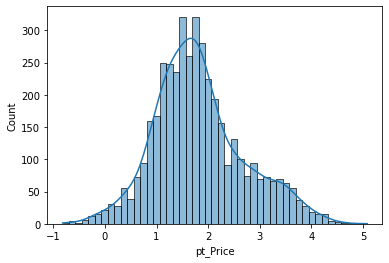

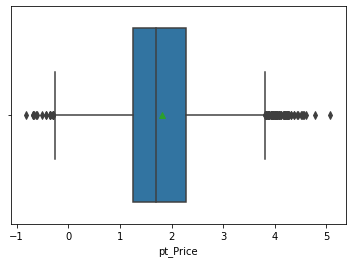

In [ ]:
# Use histplot and boxplot to see the distribution of pt_Price post-transformation

sns.histplot(data=df_train,x='pt_Price', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_Price', showmeans=True)
plt.show()

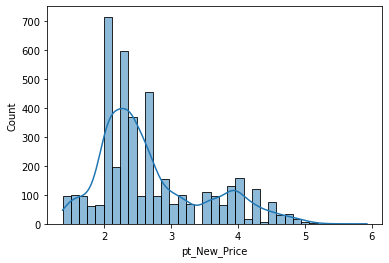

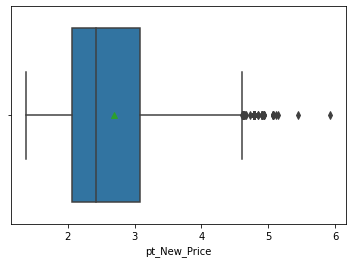

In [ ]:
# Use histplot and boxplot to see the distribution of pt_New_Price post-transformation

sns.histplot(data=df_train,x='pt_New_Price', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_New_Price', showmeans=True)
plt.show()


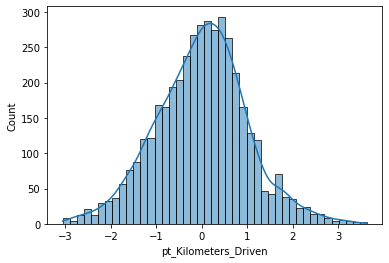

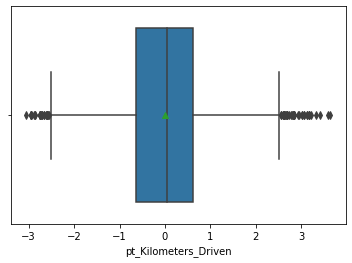

In [ ]:
# Use histplot and boxplot to see the distribution of pt_Kilometers_Driven post-transformation

sns.histplot(data=df_train,x='pt_Kilometers_Driven', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_Kilometers_Driven', showmeans=True)
plt.show()


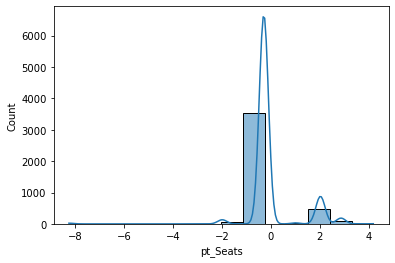

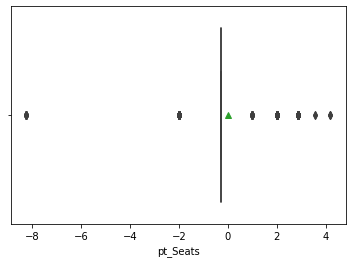

In [ ]:
# Use histplot and boxplot to see the distribution of pt_Seats post-transformation


sns.histplot(data=df_train,x='pt_Seats', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_Seats', showmeans=True)
plt.show()


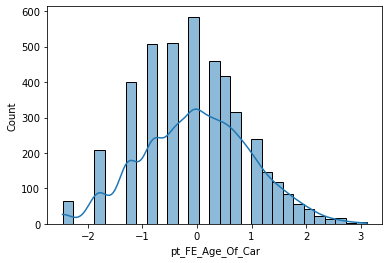

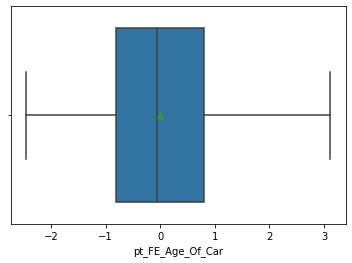

In [ ]:
# Use histplot and boxplot to see the distribution of pt_FE_Age_Of_Car post-transformation

sns.histplot(data=df_train,x='pt_FE_Age_Of_Car', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_FE_Age_Of_Car', showmeans=True)
plt.show()


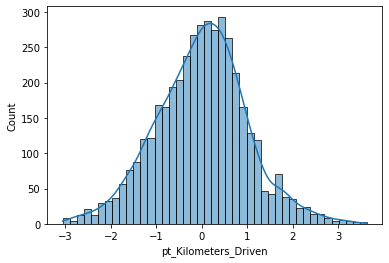

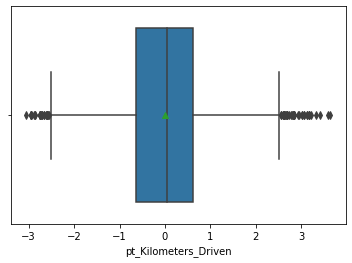

In [ ]:
# Use histplot and boxplot to see the distribution of pt_Kilometers_Driven post-transformation

sns.histplot(data=df_train,x='pt_Kilometers_Driven', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_Kilometers_Driven', showmeans=True)
plt.show()


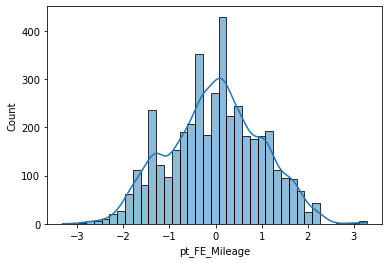

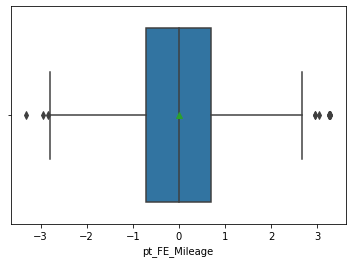

In [ ]:
# Use histplot and boxplot to see the distribution of pt_FE_Mileage post-transformation

sns.histplot(data=df_train,x='pt_FE_Mileage', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_FE_Mileage', showmeans=True)
plt.show()


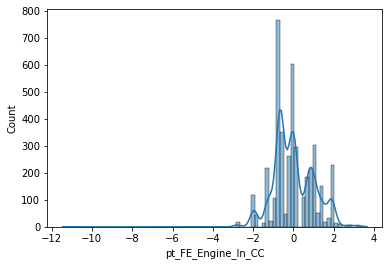

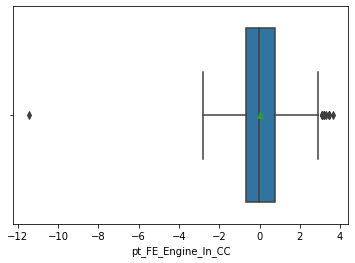

In [ ]:
# Use histplot and boxplot to see the distribution of pt_FE_Engine_In_CC post-transformation

sns.histplot(data=df_train,x='pt_FE_Engine_In_CC', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_FE_Engine_In_CC', showmeans=True)
plt.show()


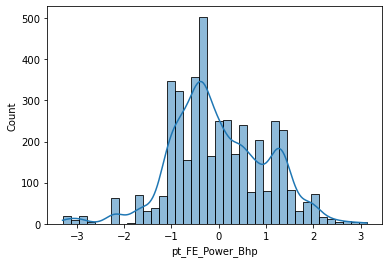

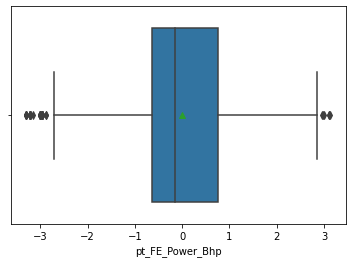

In [ ]:
# Use histplot and boxplot to see the distribution of pt_FE_Power_Bhp post-transformation

sns.histplot(data=df_train,x='pt_FE_Power_Bhp', kde=True)
plt.show()

sns.boxplot(data=df_train,x='pt_FE_Power_Bhp', showmeans=True)
plt.show()


In [ ]:
# Check shape of the data
print(" Rows:", df_train.shape[0], '\n', "Columns:" , df_train.shape[1])

 Rows: 4213 
 Columns: 13


In [ ]:
# One Hot Encoding of categorical features

df_train = pd.get_dummies(df_train, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'FE_Brand_Name'], drop_first=True)



In [ ]:
# Check shape of the data after One Hot Encoding

print(" Rows:", df_train.shape[0], '\n', "Columns:" , df_train.shape[1])

 Rows: 4213 
 Columns: 35


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4054 to 1289
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pt_Price                     4213 non-null   float64
 1   pt_New_Price                 4213 non-null   float64
 2   pt_Kilometers_Driven         4213 non-null   float64
 3   pt_Seats                     4213 non-null   float64
 4   pt_FE_Age_Of_Car             4213 non-null   float64
 5   pt_FE_Mileage                4213 non-null   float64
 6   pt_FE_Engine_In_CC           4213 non-null   float64
 7   pt_FE_Power_Bhp              4213 non-null   float64
 8   Location_Bangalore           4213 non-null   uint8  
 9   Location_Chennai             4213 non-null   uint8  
 10  Location_Coimbatore          4213 non-null   uint8  
 11  Location_Delhi               4213 non-null   uint8  
 12  Location_Hyderabad           4213 non-null   uint8  
 13  Location_Jaipur

In [ ]:
df_train.sample(10, random_state=1)

,pt_Price,pt_New_Price,pt_Kilometers_Driven,pt_Seats,pt_FE_Age_Of_Car,pt_FE_Mileage,pt_FE_Engine_In_CC,pt_FE_Power_Bhp,Location_Bangalore,Location_Chennai,...,Owner_Type_Third,FE_Brand_Name_audi,FE_Brand_Name_bmw,FE_Brand_Name_ford,FE_Brand_Name_honda,FE_Brand_Name_hyundai,FE_Brand_Name_maruti,FE_Brand_Name_mercedes-benz,FE_Brand_Name_toyota,FE_Brand_Name_volkswagen
5753,1.79,2.81,0.25,-0.29,-0.06,0.54,-0.10,-0.45,0,0,...,0,0,0,0,0,0,0,0,0,0
661,1.42,2.01,0.37,-0.29,-0.06,1.33,-0.90,-0.94,0,0,...,0,0,0,0,0,1,0,0,0,0
5577,0.97,2.32,0.11,-0.29,0.54,0.90,-0.69,-0.79,0,0,...,0,0,0,0,0,0,0,0,0,1
2612,2.87,4.00,0.54,-0.29,-0.06,0.17,0.80,1.36,0,1,...,0,0,1,0,0,0,0,0,0,0
2549,1.59,2.06,0.49,-0.29,-0.06,0.22,-0.70,-0.38,0,0,...,0,0,0,0,0,0,1,0,0,0
3030,2.71,4.00,-0.52,-0.29,0.54,1.04,0.80,1.42,0,0,...,1,0,1,0,0,0,0,0,0,0
1304,1.30,2.33,0.36,-0.29,0.25,0.08,-0.70,-0.48,0,0,...,0,0,0,0,0,1,0,0,0,0
4223,3.71,4.01,-0.42,-1.99,-0.06,-1.82,1.90,1.86,0,0,...,0,0,1,0,0,0,0,0,0,0
3187,1.61,2.58,2.31,-0.29,0.25,0.56,0.16,0.09,0,1,...,0,0,0,0,0,0,0,0,0,1
2463,2.05,3.18,0.31,2.03,0.54,-1.32,1.42,0.01,0,0,...,0,0,0,0,0,0,0,0,1,0


# 11. TRAIN Dataset - Linear Regression Model

In [ ]:
# Build Linear Regression Model

# independant variables
X_train = df_train.drop('pt_Price', axis=1)

# Dependent variable
y_train = df_train[['pt_Price']]


In [ ]:
# Fit the model

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Get the Coefficients

coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.sort_values(by='Coefficients', ascending=False)

,Coefficients
Fuel_Type_Electric,2.13
Intercept,0.59
pt_New_Price,0.48
FE_Brand_Name_maruti,0.30
pt_FE_Power_Bhp,0.21
Location_Bangalore,0.20
FE_Brand_Name_toyota,0.19
FE_Brand_Name_mercedes-benz,0.16
FE_Brand_Name_audi,0.15
Location_Hyderabad,0.15


In [ ]:
# Get the intercept

intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.5854590901531598


In [ ]:
# Get the r2 score

regression_model.score(X_train, y_train)

0.9222897336537249

In [ ]:
# function to compute adjusted R-squared, used as-is from the MLS. Remove MAPE from displaying

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
                  },
        index=[0],
    )

    return df_perf

In [ ]:
# Checking model performance on TRAIN set

print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(regression_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.24,0.18,0.92,0.92


# 12. TEST Dataset Preparation

All the Data preprocessing, Missing value and Outlier treatment, Feature Enginerring and Feature Scaling operations done on TRAIN dataset are now done on TEST dataset.

Values used for TRAIN are used for TEST dataset for treating missing values, outliers, incorrect values.

In [ ]:
#Check data shape

print(" Total Dataset \n Rows:", df_test.shape[0], '\n', "Columns:" , df_test.shape[1])

 Total Dataset 
 Rows: 1806 
 Columns: 13


In [ ]:
df_test.isnull().sum().sort_values(ascending=False)

Power                38
Seats                11
Engine                8
Mileage               1
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
New_Price             0
Price                 0
dtype: int64

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 1463 to 4203
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1806 non-null   object 
 1   Location           1806 non-null   object 
 2   Year               1806 non-null   int64  
 3   Kilometers_Driven  1806 non-null   int64  
 4   Fuel_Type          1806 non-null   object 
 5   Transmission       1806 non-null   object 
 6   Owner_Type         1806 non-null   object 
 7   Mileage            1805 non-null   object 
 8   Engine             1798 non-null   object 
 9   Power              1768 non-null   object 
 10  Seats              1795 non-null   float64
 11  New_Price          1806 non-null   float64
 12  Price              1806 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 197.5+ KB


### 12.1. Year

In [ ]:
# Age of the car really is relevant feature rather than year when the car was made

df_test['FE_Age_Of_Car'] = dt.date.today().year - df_test['Year']

In [ ]:
# Drop the feature Year

df_test.drop('Year', axis=1, inplace=True)

In [ ]:
# Outlier treatment - Replace with median calculated with TRAIN dataset

df_test.loc[df_test.FE_Age_Of_Car > Temp_upper_whisker_FE_Age_Of_Car, 'FE_Age_Of_Car'] = np.nan
df_test['FE_Age_Of_Car'].fillna(Temp_q2_FE_Age_Of_Car, inplace=True)  # Median

### 12.2. Seats

In [ ]:
# Fill missing values with median calculated with TRAIN dataset

df_test['Seats'].fillna(Temp_Train_Median_Seats, inplace=True) 


In [ ]:
# Change the datatype of Seats to integer

df_test['Seats'] = df_test['Seats'].astype(int)

In [ ]:
# Replace record with 0 seats with median calculated with TRAIN dataset

df_test['Seats'] = df_test['Seats'].replace(0, Temp_Train_Median_Seats)

df_test[df_test[Temp_v]==0]

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car


### 12.3 Name

In [ ]:
Temp_Brand = df_test['Name'].str.split(' ', n = 1, expand = True) 
Temp_Brand.head()

,0,1
1463,Chevrolet,Optra 1.6 LS
181,Ford,Fiesta 1.4 TDCi EXI Limited Edition
2506,Audi,A4 35 TDI Premium
3374,Renault,Duster 110PS Diesel RxZ AMT
5816,Nissan,Sunny 2011-2014 XL


In [ ]:
df_test['FE_Brand_Name'] = Temp_Brand[0].str.lower()

In [ ]:
# Drop Name column from the TRAIN set

df_test.drop('Name', axis=1, inplace=True)

In [ ]:
df_test['FE_Brand_Name'] = df_test['FE_Brand_Name'].replace(['mahindra', 'tata', 'skoda', 'renault',
       'chevrolet', 'nissan', 'land', 'jaguar', 'fiat', 'mini', 'mitsubishi',
       'volvo', 'porsche', 'jeep', 'datsun', 'force', 'smart', 'bentley',
       'ambassador', 'isuzu', 'lamborghini'], 'Others')

In [ ]:
df_test['FE_Brand_Name'].value_counts().sort_values(ascending=False)

Others           373
maruti           366
hyundai          332
honda            172
toyota           137
mercedes-benz    101
ford              92
volkswagen        83
audi              78
bmw               72
Name: FE_Brand_Name, dtype: int64

### 12.4. Mileage

In [ ]:
Temp_Test_Mileage = df_test['Mileage'].str.split(' ', n = 1, expand = True) 
Temp_Test_Mileage.columns = ['Mileage_Value', 'Mileage_UoM']
Temp_Test_Mileage.sample(10, random_state=1)

,Mileage_Value,Mileage_UoM
1717,14.95,kmpl
5962,21.1,kmpl
358,20.36,kmpl
1920,28.4,kmpl
2436,19.2,km/kg
3217,18.0,kmpl
2236,17.68,kmpl
785,18.9,kmpl
5360,19.01,kmpl
5147,12.05,kmpl


In [ ]:
# Checking break down of Km/Kg and Kmpl

Temp_Test_Mileage['Mileage_UoM'].value_counts()

kmpl     1785
km/kg      20
Name: Mileage_UoM, dtype: int64

In [ ]:
Temp_Test_Mileage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 1463 to 4203
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Mileage_Value  1805 non-null   object
 1   Mileage_UoM    1805 non-null   object
dtypes: object(2)
memory usage: 42.3+ KB


In [ ]:
Temp_Test_Mileage[Temp_Test_Mileage['Mileage_UoM'] == 'km/kg'].head()


,Mileage_Value,Mileage_UoM
1911,26.6,km/kg
127,26.6,km/kg
3119,32.26,km/kg
987,17.3,km/kg
4141,33.54,km/kg


In [ ]:
Temp_Test_Mileage['Mileage_Value'] = pd.to_numeric(Temp_Test_Mileage['Mileage_Value'])

In [ ]:
Temp_Test_Mileage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 1463 to 4203
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mileage_Value  1805 non-null   float64
 1   Mileage_UoM    1805 non-null   object 
dtypes: float64(1), object(1)
memory usage: 42.3+ KB


In [ ]:
# Convert Km/Kg records to Kmpl

def kmkg_to_kmpl(val, uom):
    """Function to convert Mileage records from Km/Kg to KmPL."""
    if uom == 'km/kg':
      multiplier = 1.96 #Referenced internet for this conversion
    else:
      multiplier = 1
    return val * multiplier

Temp_Test_Mileage['Converted_Mileage_Value']=Temp_Test_Mileage[['Mileage_Value', 'Mileage_UoM']].apply(lambda x:kmkg_to_kmpl(x.Mileage_Value,x.Mileage_UoM), axis=1)

In [ ]:
# Confirm that values are calculated correctly when its km/kg

Temp_Test_Mileage[Temp_Test_Mileage['Mileage_UoM'] == 'km/kg'].head()


,Mileage_Value,Mileage_UoM,Converted_Mileage_Value
1911,26.60,km/kg,52.14
127,26.60,km/kg,52.14
3119,32.26,km/kg,63.23
987,17.30,km/kg,33.91
4141,33.54,km/kg,65.74


In [ ]:
# Confirm that values are unchanged when its kmpl

Temp_Test_Mileage[Temp_Test_Mileage['Mileage_UoM'] == 'kmpl'].head()

,Mileage_Value,Mileage_UoM,Converted_Mileage_Value
1463,14.70,kmpl,14.70
181,17.80,kmpl,17.80
2506,17.11,kmpl,17.11
3374,19.60,kmpl,19.60
5816,16.95,kmpl,16.95


In [ ]:
# Update the value for Mileage with only numeric part

df_test['FE_Mileage'] = Temp_Test_Mileage['Converted_Mileage_Value']

In [ ]:
# Change the data type of FE_Mileage to float

df_test['FE_Mileage'] = pd.to_numeric(df_test['FE_Mileage'])

In [ ]:
df_test[df_test['FE_Mileage'].isnull()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage
4904,Mumbai,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5,24.01,12.75,11.00,toyota,NaN


In [ ]:
# Fill missing values with median calculated with TRAIN dataset

df_test['FE_Mileage'].fillna(Temp_q2_FE_Mileage, inplace=True)  # Median
df_test['FE_Mileage'].isnull().sum()


0

In [ ]:
# Fill missing values with median calculated with TRAIN dataset

df_test['FE_Mileage'] = df_test['FE_Mileage'].replace(0.00, Temp_q2_FE_Mileage)  # Median


In [ ]:
# Outlier treatment

# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method

#df_test.loc[df_test.FE_Mileage > Temp_upper_whisker_FE_Mileage, 'FE_Mileage'] = np.nan
#df_test['FE_Mileage'].fillna(Temp_q2_FE_Mileage, inplace=True)  # Median 



In [ ]:
# Outlier treatment

# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method

#df_test.loc[df_test.FE_Mileage < Temp_lower_whisker_FE_Mileage, 'FE_Mileage'] = np.nan
#df_test['FE_Mileage'].fillna(Temp_q2_FE_Mileage, inplace=True)  # Median


In [ ]:
# Drop Mileage column from the TEST set

df_test.drop('Mileage', axis=1, inplace=True)

### 12.5. Engine

In [ ]:
Temp_Test_Engine = df_test['Engine'].str.split(' ', n = 1, expand = True) 
Temp_Test_Engine.head()

,0,1
1463,1599,CC
181,1399,CC
2506,1968,CC
3374,1461,CC
5816,1498,CC


In [ ]:
Temp_Test_Engine[1].value_counts()

CC    1798
Name: 1, dtype: int64

In [ ]:
df_test['FE_Engine_In_CC'] = Temp_Test_Engine[0]

In [ ]:
# Change the data type of FE_Mileage to float

df_test['FE_Engine_In_CC'] = pd.to_numeric(df_test['FE_Engine_In_CC'])

In [ ]:
df_test['FE_Engine_In_CC'].isnull().sum()

8

In [ ]:
# Fill missing values

# now using `fillna` with a numeric column
df_test['FE_Engine_In_CC'].fillna(Temp_q2_FE_Engine_In_CC, inplace=True)  # Median
df_test['FE_Engine_In_CC'].isnull().sum()

0

In [ ]:
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method

#df_test.loc[df_test.FE_Engine_In_CC > Temp_upper_whisker_FE_Engine_In_CC, 'FE_Engine_In_CC'] = np.nan
#df_test['FE_Engine_In_CC'].fillna(Temp_q2_FE_Engine_In_CC, inplace=True)  # Median


In [ ]:
# Drop Mileage column from the TRAIN set

df_test.drop('Engine', axis=1, inplace=True)

### 12.6. Power

In [ ]:
Temp_Test_Power = df_test['Power'].str.split(' ', n = 1, expand = True) 
Temp_Test_Power.head()

,0,1
1463,104,bhp
181,68,bhp
2506,174.33,bhp
3374,108.45,bhp
5816,97.7,bhp


In [ ]:
df_test['FE_Power_Bhp'] = Temp_Test_Power[0]

In [ ]:
# Change the data type of FE_Mileage to float

df_test['FE_Power_Bhp'] = pd.to_numeric(df_test['FE_Power_Bhp'])

In [ ]:
df_test['FE_Power_Bhp'].isnull().sum()

38

In [ ]:
# Fill missing values

df_test['FE_Power_Bhp'].fillna(Temp_q2_FE_Power_Bhp, inplace=True)  # Median
df_test['FE_Power_Bhp'].isnull().sum()

0

In [ ]:
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method

#df_test.loc[df_test.FE_Power_Bhp > Temp_upper_whisker_FE_Power_Bhp, 'FE_Power_Bhp'] = np.nan
#df_test['FE_Power_Bhp'].fillna(Temp_q2_FE_Power_Bhp, inplace=True)  # Median


In [ ]:
# Drop Power column from the TEST set

df_test.drop('Power', axis=1, inplace=True)

### 12.7. Kilometers_Driven

In [ ]:
df_test.loc[df_test.Kilometers_Driven > Temp_upper_whisker_Kilometers_Driven, 'Kilometers_Driven'] = np.nan
df_test['Kilometers_Driven'].fillna(Temp_q2_Kilometers_Driven, inplace=True)  # Median


### 12.8. New_Price

In [ ]:
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method

#df_test.loc[df_test.New_Price > Temp_upper_whisker_New_Price, 'New_Price'] = np.nan
#df_test['New_Price'].fillna(Temp_q2_New_Price, inplace=True)  # Median


### 12.9. Price

In [ ]:
# Many records may be outliers from the point of 1.5 IQR definition. However, simple google search confirms that records indeed are genuine. Some of the cars indeed have those specs. So its not an incorrect data that needs a fix
# Decided NOT to treat outliers

# If Outliers were incorrect records, I would have used below method

#df_test.loc[df_test.Price > Temp_upper_whisker_Price, 'Price'] = np.nan
#df_test['Price'].fillna(Temp_q2_Price, inplace=True)  # Median


In [ ]:
df_test[df_test['Price'].isnull()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,FE_Age_Of_Car,FE_Brand_Name,FE_Mileage,FE_Engine_In_CC,FE_Power_Bhp


### 12.10 TEST Feature Engineering

In [ ]:
# Check shape of the data 

print(" Total Dataset \n Rows:", df_test.shape[0], '\n', "Columns:" , df_test.shape[1])

 Total Dataset 
 Rows: 1806 
 Columns: 13


In [ ]:
# Use PowerTransformer to transform the data to get it closer to Normal distibution

pt = PowerTransformer(method='box-cox')

#df_test[['pt_Price']] = pt.fit_transform(df_test[['Price']])
#df_test[['pt_New_Price']] = pt.fit_transform(df_test[['New_Price']])

df_test[['pt_Price']] = np.log(df_test[['Price']])
df_test[['pt_New_Price']] = np.log(df_test[['New_Price']])

df_test[['pt_Kilometers_Driven']] = pt.fit_transform(df_test[['Kilometers_Driven']])
df_test[['pt_Seats']] = pt.fit_transform(df_test[['Seats']])
df_test[['pt_FE_Age_Of_Car']] = pt.fit_transform(df_test[['FE_Age_Of_Car']])
df_test[['pt_FE_Mileage']] = pt.fit_transform(df_test[['FE_Mileage']])
df_test[['pt_FE_Engine_In_CC']] = pt.fit_transform(df_test[['FE_Engine_In_CC']])
df_test[['pt_FE_Power_Bhp']] = pt.fit_transform(df_test[['FE_Power_Bhp']])

In [ ]:
df_test = pd.get_dummies(df_test, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'FE_Brand_Name'], drop_first=True)


In [ ]:
# Drop columns that are transformed with PowerTransformer

df_test.drop('Price', axis=1, inplace=True)
df_test.drop('New_Price', axis=1, inplace=True)
df_test.drop('Kilometers_Driven', axis=1, inplace=True)
df_test.drop('Seats', axis=1, inplace=True)
df_test.drop('FE_Age_Of_Car', axis=1, inplace=True)
df_test.drop('FE_Mileage', axis=1, inplace=True)
df_test.drop('FE_Engine_In_CC', axis=1, inplace=True)
df_test.drop('FE_Power_Bhp', axis=1, inplace=True)


In [ ]:
# Check shape of the data after One Hot Encoding

print(" Total Dataset \n Rows:", df_test.shape[0], '\n', "Columns:" , df_test.shape[1])

 Total Dataset 
 Rows: 1806 
 Columns: 35


In [ ]:
df_test.sample(10)

,pt_Price,pt_New_Price,pt_Kilometers_Driven,pt_Seats,pt_FE_Age_Of_Car,pt_FE_Mileage,pt_FE_Engine_In_CC,pt_FE_Power_Bhp,Location_Bangalore,Location_Chennai,...,Owner_Type_Third,FE_Brand_Name_audi,FE_Brand_Name_bmw,FE_Brand_Name_ford,FE_Brand_Name_honda,FE_Brand_Name_hyundai,FE_Brand_Name_maruti,FE_Brand_Name_mercedes-benz,FE_Brand_Name_toyota,FE_Brand_Name_volkswagen
949,1.97,2.66,0.88,-0.30,0.31,-0.25,-0.01,0.23,0,0,...,0,0,0,0,0,1,0,0,0,0
4480,1.79,2.11,0.40,-0.30,-0.01,1.21,-0.94,-0.93,0,0,...,0,0,0,0,0,1,0,0,0,0
3335,1.37,3.05,0.36,-0.30,1.13,-0.85,0.53,0.77,0,0,...,0,0,0,0,0,0,0,0,1,0
4412,3.90,3.90,-0.88,-0.30,-0.76,0.08,1.85,1.16,0,0,...,0,0,0,0,0,0,0,1,0,0
2517,2.08,2.66,-0.54,-0.30,-0.76,-0.10,-0.22,0.13,1,0,...,0,0,0,0,0,1,0,0,0,0
5312,3.24,3.97,0.02,-0.30,-0.37,-0.96,0.79,1.27,0,0,...,0,1,0,0,0,0,0,0,0,0
4874,1.24,2.11,0.85,-0.30,-1.20,1.21,-0.94,-0.93,0,0,...,0,0,0,0,0,1,0,0,0,0
747,0.14,2.03,0.74,-0.30,1.60,-0.15,-0.22,-1.79,0,1,...,0,0,0,0,0,0,0,0,0,0
4996,1.10,2.61,0.58,-0.30,1.37,-0.20,-0.00,0.40,0,0,...,0,0,0,0,1,0,0,0,0,0
3794,3.37,4.47,0.05,-0.30,-0.01,-0.95,1.03,1.58,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# check missing values 

df_test.isnull().sum().sort_values(ascending=False).sum()

0

In [ ]:
# Check TRAIN dataset 

print(" Total Dataset \n Rows:", df_train.shape[0], '\n', "Columns:" , df_train.shape[1])

 Total Dataset 
 Rows: 4213 
 Columns: 35


In [ ]:
df_train.sample(10)

,pt_Price,pt_New_Price,pt_Kilometers_Driven,pt_Seats,pt_FE_Age_Of_Car,pt_FE_Mileage,pt_FE_Engine_In_CC,pt_FE_Power_Bhp,Location_Bangalore,Location_Chennai,...,Owner_Type_Third,FE_Brand_Name_audi,FE_Brand_Name_bmw,FE_Brand_Name_ford,FE_Brand_Name_honda,FE_Brand_Name_hyundai,FE_Brand_Name_maruti,FE_Brand_Name_mercedes-benz,FE_Brand_Name_toyota,FE_Brand_Name_volkswagen
4411,1.33,1.71,0.49,-0.29,-0.06,1.89,-1.26,-1.49,0,0,...,0,0,0,0,0,0,1,0,0,0
367,1.06,1.47,-0.97,-0.29,-1.80,1.48,-1.98,-2.15,0,0,...,0,0,0,0,0,0,1,0,0,0
1194,4.24,4.47,-1.56,-0.29,-1.26,-1.32,1.90,2.03,0,0,...,0,0,0,0,0,0,0,1,0,0
1319,-0.16,2.21,1.73,-0.29,2.06,-0.66,-0.59,-0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
3205,2.28,2.71,0.41,-0.29,-0.80,0.20,-0.10,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
2882,1.67,2.03,0.61,-0.29,-0.80,1.72,-0.03,-0.02,0,0,...,0,0,0,1,0,0,0,0,0,0
2579,0.14,1.52,-0.03,-0.29,1.88,-0.29,-1.00,-0.15,0,0,...,0,0,0,0,0,1,0,0,0,0
5951,1.98,2.61,-0.12,-0.29,-0.06,-0.29,-0.03,0.41,0,0,...,0,0,0,0,1,0,0,0,0,0
554,1.59,2.61,-0.03,-0.29,1.69,-1.18,0.51,0.63,0,0,...,0,0,0,0,1,0,0,0,0,0
5622,1.95,2.17,-0.59,-0.29,-0.80,0.75,-0.70,-0.47,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4054 to 1289
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pt_Price                     4213 non-null   float64
 1   pt_New_Price                 4213 non-null   float64
 2   pt_Kilometers_Driven         4213 non-null   float64
 3   pt_Seats                     4213 non-null   float64
 4   pt_FE_Age_Of_Car             4213 non-null   float64
 5   pt_FE_Mileage                4213 non-null   float64
 6   pt_FE_Engine_In_CC           4213 non-null   float64
 7   pt_FE_Power_Bhp              4213 non-null   float64
 8   Location_Bangalore           4213 non-null   uint8  
 9   Location_Chennai             4213 non-null   uint8  
 10  Location_Coimbatore          4213 non-null   uint8  
 11  Location_Delhi               4213 non-null   uint8  
 12  Location_Hyderabad           4213 non-null   uint8  
 13  Location_Jaipur

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 1463 to 4203
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pt_Price                     1806 non-null   float64
 1   pt_New_Price                 1806 non-null   float64
 2   pt_Kilometers_Driven         1806 non-null   float64
 3   pt_Seats                     1806 non-null   float64
 4   pt_FE_Age_Of_Car             1806 non-null   float64
 5   pt_FE_Mileage                1806 non-null   float64
 6   pt_FE_Engine_In_CC           1806 non-null   float64
 7   pt_FE_Power_Bhp              1806 non-null   float64
 8   Location_Bangalore           1806 non-null   uint8  
 9   Location_Chennai             1806 non-null   uint8  
 10  Location_Coimbatore          1806 non-null   uint8  
 11  Location_Delhi               1806 non-null   uint8  
 12  Location_Hyderabad           1806 non-null   uint8  
 13  Location_Jaipur

TEST dataset looks good and is in the same format as TRAIN

# 13. TEST Dataset - Model Performance Check

In [ ]:
# independant variables

X_test = df_test.drop('pt_Price', axis=1)
# the dependent variable
y_test = df_test[['pt_Price']]

In [ ]:
# Checking model performance on TEST set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(regression_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.27,0.19,0.90,0.90


In [ ]:
predc

In [ ]:
# Checking model performance on TRAIN set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(regression_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.24,0.18,0.92,0.92


# 14. TRAIN Dataset - Forward Feature Selection using SequentialFeatureSelector


In [ ]:
# please uncomment and run the next line if mlxtend library is not previously installed
!pip install mlxtend

In [ ]:
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg, # the model object
    k_features=X_train.shape[1], # k_features denotes the number of features to select
                                 # specify the nummber of features to be used, it could be a number, 
                                 # by default we'll initially use all the features and check the new model's performance
    forward=True,                
    floating=False,
    scoring="r2", # the metric we are trying to optimize
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,  # changing this will alter (or remove) the summary of the training job
    cv=5,      # cross validation - train  my model for 5 times
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    5.3s finished

[2022-04-02 07:52:19] Features: 1/34 -- score: 0.6171388241793959[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished

[2022-04-02 07:52:19] Features: 2/34 -- score: 0.8537965492743954[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2022-04-02 07:52:19] Features: 3/34 -- score: 0.8812727465808343[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished

[2022-04-02 07:52:20] Features: 4/34 -- score: 0.8903116772171117[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.2s remaining:

In [ ]:
sfs.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.61007058, 0.5918457 , 0.60899375, 0.61763276, 0.65715133]),
  'avg_score': 0.6171388241793959,
  'feature_names': ('pt_New_Price',),
  'ci_bound': 0.027907625163820907,
  'std_dev': 0.021713080491203598,
  'std_err': 0.010856540245601799},
 2: {'feature_idx': (0, 3),
  'cv_scores': array([0.85153498, 0.86197214, 0.84459663, 0.84863563, 0.86224336]),
  'avg_score': 0.8537965492743954,
  'feature_names': ('pt_New_Price', 'pt_FE_Age_Of_Car'),
  'ci_bound': 0.009171198523810533,
  'std_dev': 0.007135504027281469,
  'std_err': 0.003567752013640734},
 3: {'feature_idx': (0, 3, 6),
  'cv_scores': array([0.88304017, 0.88308791, 0.8796206 , 0.87110179, 0.88951325]),
  'avg_score': 0.8812727465808343,
  'feature_names': ('pt_New_Price', 'pt_FE_Age_Of_Car', 'pt_FE_Power_Bhp'),
  'ci_bound': 0.007722498485606685,
  'std_dev': 0.006008366180457127,
  'std_err': 0.0030041830902285634},
 4: {'feature_idx': (0, 3, 6, 30),
  'cv_scores': array([0.892735

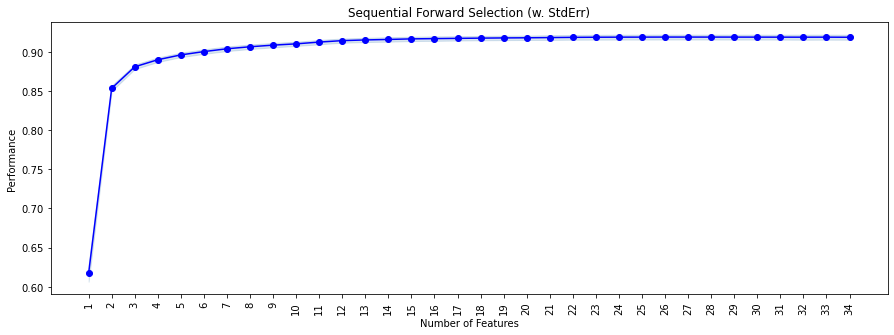

In [ ]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=27, # best performance seem to be for 27 features, which features to choose will be decided by the model
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished

[2022-04-02 07:52:30] Features: 1/27 -- score: 0.6171388241793959[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.2s finished

[2022-04-02 07:52:30] Features: 2/27 -- score: 0.8537965492743954[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2022-04-02 07:52:30] Features: 3/27 -- score: 0.8812727465808343[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.2s finished

[2022-04-02 07:52:31] Features: 4/27 -- score: 0.8903116772171117[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished



In [ ]:
# let us select the features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [ ]:
len(feat_cols)

27

In [ ]:
# let us look at the names of the identified features
X_train.columns[feat_cols]

Index(['pt_New_Price', 'pt_Kilometers_Driven', 'pt_Seats', 'pt_FE_Age_Of_Car',
       'pt_FE_Mileage', 'pt_FE_Engine_In_CC', 'pt_FE_Power_Bhp',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Hyderabad', 'Location_Kolkata', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second', 'Owner_Type_Third', 'FE_Brand_Name_audi',
       'FE_Brand_Name_bmw', 'FE_Brand_Name_ford', 'FE_Brand_Name_honda',
       'FE_Brand_Name_hyundai', 'FE_Brand_Name_maruti',
       'FE_Brand_Name_mercedes-benz', 'FE_Brand_Name_toyota',
       'FE_Brand_Name_volkswagen'],
      dtype='object')

# 15. Final Model Selection

In [ ]:
X_train_final = X_train[X_train.columns[feat_cols]]

In [ ]:
X_train_final.head()

,pt_New_Price,pt_Kilometers_Driven,pt_Seats,pt_FE_Age_Of_Car,pt_FE_Mileage,pt_FE_Engine_In_CC,pt_FE_Power_Bhp,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Owner_Type_Third,FE_Brand_Name_audi,FE_Brand_Name_bmw,FE_Brand_Name_ford,FE_Brand_Name_honda,FE_Brand_Name_hyundai,FE_Brand_Name_maruti,FE_Brand_Name_mercedes-benz,FE_Brand_Name_toyota,FE_Brand_Name_volkswagen
4054,2.33,-1.00,-0.29,-1.26,1.01,-0.23,-0.30,0,0,0,...,0,0,0,0,0,1,0,0,0,0
538,2.46,1.45,-0.29,0.54,-0.09,-0.23,-1.07,0,0,0,...,0,0,0,1,0,0,0,0,0,0
148,4.85,-1.12,-1.99,0.25,-1.86,1.82,2.82,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5859,3.62,0.62,2.03,-0.80,-1.32,1.89,1.18,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4051,2.14,0.54,-0.29,-0.06,-0.34,-0.03,-0.30,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Create TEST dataset with above identified features

X_test_final = X_test[X_train_final.columns]

In [ ]:
# Fitting linear model - V2 : Retraining the model on the identified features. Feature Selection only tell you what the performance
# of your model would be if you choose k number of features. To create a model object for making future predictions we have to 
# retrain and add a version to the model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=X_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                             Coefficients
pt_New_Price                         0.48
pt_Kilometers_Driven                -0.06
pt_Seats                            -0.02
pt_FE_Age_Of_Car                    -0.36
pt_FE_Mileage                       -0.01
pt_FE_Engine_In_CC                   0.10
pt_FE_Power_Bhp                      0.21
Location_Bangalore                   0.25
Location_Chennai                     0.09
Location_Coimbatore                  0.13
Location_Hyderabad                   0.20
Location_Kolkata                    -0.16
Fuel_Type_Electric                   2.14
Fuel_Type_LPG                        0.04
Fuel_Type_Petrol                    -0.17
Transmission_Manual                 -0.11
Owner_Type_Second                   -0.09
Owner_Type_Third                    -0.20
FE_Brand_Name_audi                   0.16
FE_Brand_Name_bmw                    0.14
FE_Brand_Name_ford                   0.06
FE_Brand_Name_honda                  0.09
FE_Brand_Name_hyundai             

In [ ]:
# model performance on TRAIN set
print("TRAIN Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, X_train_final, y_train
)
lin_reg_model2_train_perf

TRAIN Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.24,0.18,0.92,0.92


In [ ]:
# model performance on TEST set
print("TEST Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, X_test_final, y_test
)
lin_reg_model2_test_perf

TEST Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,0.27,0.19,0.90,0.90


In [ ]:
# TRAIN performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("TRAIN performance comparison:")
models_train_comp_df

TRAIN performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.24,0.24
MAE,0.18,0.18
R-squared,0.92,0.92
Adj. R-squared,0.92,0.92


In [ ]:
# TEST performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("TEST performance comparison:")
models_test_comp_df

TEST performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.27,0.27
MAE,0.19,0.19
R-squared,0.90,0.90
Adj. R-squared,0.90,0.90


# 16. <b><font color="blue"> Description of the Recommended Model</b>

1. The task was to come up with a Machine Learning Model to predict the price of a used car (aka Dependent Feature in this case) on the basis of the relevant factors (aka Independent Features) like Location, Km driven by the car, Engine, Power etc.

2. The model is a Multiple Linear Regression model. It has following format - 

          y = b0 + b1*x1 + b2*x2 + b3*x3.......+ bn*xn

          y : Value to be predicted (Dependent Feature). In this case, Price

          x1,x2 etc: Features that potentially impact y (Dependent Features). In this case, those are other details in the dataset

          b1,b2 etc: Coefficients corresponding to x1,x2 etc. Positive value of b1,b2 etc. indicates that 1 unit increase in the value of feature x1,x2 etc. will increase value of y by b1, b2 etc, assuming all other features remain unchanged. Similarly negative values of b will cause decrease in value of y.

          b0 = Coefficint that represents y when all x values are zero
    

3. Details of the recommended model - 

          3a. b0 is 0.52

          3b. x features and corresponding b coeffients are -

                pt_New_Price                         0.48
                pt_Kilometers_Driven                -0.06
                pt_Seats                            -0.02
                pt_FE_Age_Of_Car                    -0.36
                pt_FE_Mileage                       -0.01
                pt_FE_Engine_In_CC                   0.10
                pt_FE_Power_Bhp                      0.21
                Location_Bangalore                   0.25
                Location_Chennai                     0.09
                Location_Coimbatore                  0.13
                Location_Hyderabad                   0.20
                Location_Kolkata                    -0.16
                Fuel_Type_Electric                   2.14
                Fuel_Type_LPG                        0.04
                Fuel_Type_Petrol                    -0.17
                Transmission_Manual                 -0.11
                Owner_Type_Second                   -0.09
                Owner_Type_Third                    -0.20
                FE_Brand_Name_audi                   0.16
                FE_Brand_Name_bmw                    0.14
                FE_Brand_Name_ford                   0.06
                FE_Brand_Name_honda                  0.09
                FE_Brand_Name_hyundai                0.12
                FE_Brand_Name_maruti                 0.30
                FE_Brand_Name_mercedes-benz          0.16
                FE_Brand_Name_toyota                 0.19
                FE_Brand_Name_volkswagen             0.11     
    
         3c. Highest positive impact on Price is by Fuel_Type_Electric  and New_Price. 
         
            Increase Fuel_Type_Electric by 1 unit will cause increase of Price by 2.14suming all other features remain unchanged.
            Increase of New_Price by 1 unit will cause increase of Price by 0.48 assuming all other features remain unchanged.

         3d. Evauation of the model - Model has been evaluated per statistical evaluation metrics mentioned in section 3.

                R-squared for the model: 90% (Percentage of variation of the dependent feature explained by the model). This is statistically significant.
    
                Adj. R-squared of the model: 90% (Percentage of variation of the dependent feature explained by the model). This is statistically significant.

                Mean Absolute Error (MAE): 0.19 (Measure of error in predicting the Price)

                Root Mean Squared Error (RMSE): 0.27  (Measure of error in predicting the Price)              
                
                

# 17. <b><font color="blue">Actionable Insights & Recommendations</b>

<b><font color ="green">Features that have higher positive impact on the Price are -

<b><font color ="green">a. Fuel_Type_Electric - choose Electric transmission cars
    
<b><font color ="green">b. New_Price - Higher is better, choose cars with higher New_Price

<b><font color ="green">c. Power - Higher is better

<b><font color ="green">d. Locations - Bangalore, Hyderabad - Prefer these locations in this order

<b><font color ="green">e. Brands - Maruti (most impact), Toyota, Mercedes-Benz, Audi, BMW - Prefer these brands in this order

<b><font color ="green">Deal in cars with above characteristics.

<b><font color ="red">Features that have higher negative impact on the Price are -

<b><font color ="red">a. Age_Of_Car (Year) - Lower age is better

<b><font color ="red">b. Owner_Type - Third or beyond owner - Lower is better

<b><font color ="red">c. Location - Kolkata - Avoid these locations

<b><font color ="red">Avoid cars with above characteristics.

All other factors are not likely to have significant impact on the Price

